# Business Analysis

## **Column description**

* **pos**: till identifier

* **store:** Store code 

* **transaction**: number assigned by the till to the transaction, bear in mind that this number is unique on a single pos, but can be repeated if compared with other tills

* **date:**date of on which the transaction occurred

* **shifted_date:** we won't consider this value

* **vat:** tax % applied to sell

* **currency:** all transactions are done on CLP

* **net_amount:** transactions net_amount

* **vat_amount:** tax amount for the transaction

* **item:** SKU

* **size:** size of the item, if not size is applicable NS is used

# Data Understanding

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.colheader_justify', 'center')
sns.set()
%matplotlib inline

## Import : Retail Sales Data 2018-2021

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
try:
  root_path = '/content/drive/MyDrive/Documents/sales_detail_report.csv'
  df = pd.read_csv(root_path , delimiter=";")
except:
  root_path = '/content/drive/MyDrive/Colab Datasets/sales_detail_report.csv'
  df = pd.read_csv(root_path , delimiter=";")

## Import : Retail Sales Data 2022 (Until March 15)

In [4]:
try:
   root_path = '/content/drive/MyDrive/Documents/sales_2022.csv'
   df_2022 = pd.read_csv(root_path).iloc[:,1:]
except:
   root_path = '/content/drive/MyDrive/Colab Datasets/sales_2022.csv'
   df_2022 = pd.read_csv(root_path).iloc[:,1:]

## First Look at the Data

In [5]:
df

,Store No.,POS Terminal No.,Transaction No.,Date,Shifted Date,VAT %,Area HO Currency Code,Net Amount,VAT Amount,Item No.,Size Description
0,CL104,CL10401,180560,01/02/18,NaN,19,CLP,"27,723.00","5,267.00",BY1610,8
1,CL104,CL10401,180563,01/02/18,NaN,19,CLP,"-52,933.00","-10,057.00",BA8899,9-
2,CL104,CL10401,180564,01/02/18,NaN,19,CLP,"52,933.00","10,057.00",BA8899,8-
3,CL104,CL10401,180569,01/02/18,NaN,19,CLP,"13,437.00","2,553.00",BQ0759,XL
4,CL104,CL10401,180570,01/02/18,NaN,19,CLP,"39,487.00","7,503.00",BQ4533,XL
...,...,...,...,...,...,...,...,...,...,...,...
11793723,CL910,CL91003,21778,12/31/21,NaN,19,CLP,252.00,48.00,S49975,NS
11793724,CL910,CL91003,21779,12/31/21,NaN,19,CLP,"25,202.00","4,788.00",GU1738,NS
11793725,CL910,CL91003,21779,12/31/21,NaN,19,CLP,252.00,48.00,S49975,NS
11793726,CL910,CL91003,21780,12/31/21,NaN,19,CLP,"54,613.00","10,377.00",FX5118,9


In [6]:
df_2022

,Store No.,POS Terminal No.,Transaction No.,Date,Shifted Date,VAT %,Area HO Currency Code,Net Amount,VAT Amount,Item No.,Size Description
0,CL105,CL10501,377706,01/02/22,NaN,19,CLP,"16,798.00","3,192.00",GK9602,XL
1,CL306,CL30602,142899,01/02/22,NaN,19,CLP,"11,756.00","2,234.00",GL3727,S
2,CL306,CL30602,142899,01/02/22,NaN,19,CLP,"12,597.00","2,393.00",FT3154,XS
3,CL306,CL30602,142900,01/02/22,NaN,19,CLP,"46,210.00","8,780.00",GE0583,XL
4,CL306,CL30602,142901,01/02/22,NaN,19,CLP,"-36,126.00","-6,864.00",FX2285,8.5
...,...,...,...,...,...,...,...,...,...,...,...
589331,CL153,CL15301,32405,03/14/22,NaN,19,CLP,"7,555.00","1,435.00",DZ9436,"S,"
589332,CL153,CL15301,32405,03/14/22,NaN,19,CLP,252.00,48.00,S49975,"NS,,,"
589333,CL153,CL15301,32405,03/14/22,NaN,19,CLP,"54,613.00","10,377.00",GA8928,"L,"
589334,CL153,CL15301,32409,03/14/22,NaN,19,CLP,"67,218.00","12,772.00",GW9999,"11-,"


In [7]:
#Renaming Columns
df.rename(columns={"Store No.":"store","POS Terminal No.":"pos","Transaction No.":"transaction","Date":"date","Shifted Date":"shifted_date","VAT %":"vat","Area HO Currency Code":"currency","Net Amount":"net_amount","VAT Amount":"vat_amount","Item No.":"item","Size Description":"size"}, inplace=True)
df_2022.rename(columns={"Store No.":"store","POS Terminal No.":"pos","Transaction No.":"transaction","Date":"date","Shifted Date":"shifted_date","VAT %":"vat","Area HO Currency Code":"currency","Net Amount":"net_amount","VAT Amount":"vat_amount","Item No.":"item","Size Description":"size"}, inplace=True)

In [8]:
df.columns

Index(['store', 'pos', 'transaction', 'date', 'shifted_date', 'vat',
       'currency', 'net_amount', 'vat_amount', 'item', 'size'],
      dtype='object')

In [9]:
df_2022.columns

Index(['store', 'pos', 'transaction', 'date', 'shifted_date', 'vat',
       'currency', 'net_amount', 'vat_amount', 'item', 'size'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11793728 entries, 0 to 11793727
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store         object 
 1   pos           object 
 2   transaction   int64  
 3   date          object 
 4   shifted_date  float64
 5   vat           int64  
 6   currency      object 
 7   net_amount    object 
 8   vat_amount    object 
 9   item          object 
 10  size          object 
dtypes: float64(1), int64(2), object(8)
memory usage: 989.8+ MB


In [11]:
df.describe(include='all')

,store,pos,transaction,date,shifted_date,vat,currency,net_amount,vat_amount,item,size
count,11793728,11793728,11793728.00,11793728,0.00,11793728.00,11793728,11793728,11793728,11793728,11793728
unique,78,204,NaN,1320,NaN,NaN,1,26628,13951,38452,387
top,CL307,CL31203,NaN,11/30/19,NaN,NaN,CLP,"16,798.00","3,192.00",S49975,M
freq,802948,233359,NaN,41088,NaN,NaN,11793728,439779,496178,404142,1888728
mean,NaN,NaN,124600.55,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,98756.55,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,44957.00,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,103978.00,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,178465.00,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for Null Values
df.isnull().sum()

store                  0
pos                    0
transaction            0
date                   0
shifted_date    11793728
vat                    0
currency               0
net_amount             0
vat_amount             0
item                   0
size                   0
dtype: int64

In [13]:
df_2022.isnull().sum()

store                0
pos                  0
transaction          0
date                 0
shifted_date    589336
vat                  0
currency             0
net_amount           0
vat_amount           0
item                 0
size                 0
dtype: int64

In [14]:
# Unique Values per Column
for columns in df:
    unq = df[columns].unique()
    print (f'{columns} - {len(unq)} \n {unq}')

store - 78 
 ['CL104' 'CL105' 'CL111' 'CL112' 'CL113' 'CL115' 'CL117' 'CL118' 'CL119'
 'CL120' 'CL121' 'CL123' 'CL124' 'CL125' 'CL126' 'CL128' 'CL131' 'CL132'
 'CL135' 'CL136' 'CL137' 'CL139' 'CL141' 'CL142' 'CL143' 'CL144' 'CL145'
 'CL146' 'CL148' 'CL149' 'CL150' 'CL151' 'CL152' 'CL171' 'CL172' 'CL173'
 'CL177' 'CL178' 'CL179' 'CL180' 'CL182' 'CL184' 'CL185' 'CL202' 'CL302'
 'CL305' 'CL306' 'CL307' 'CL308' 'CL310' 'CL311' 'CL312' 'CL901' 'CL903'
 'CL904' 'CL905' '*CL905' 'CL907' 'CL153' 'CL186' 'CL313' 'CL314' 'CL154'
 'CL906' 'CL908' 'CL909' 'CL315' 'CL155' 'CL911' 'CL910' 'CL912' 'CL158'
 'CL914' 'CL159' 'CL157' 'CL156' 'CL187' 'CL317']
pos - 204 
 ['CL10401' 'CL10402' 'CL10501' 'CL10502' 'CL10503' 'CL11101' 'CL11102'
 'CL11201' 'CL11202' 'CL11301' 'CL11302' 'CL11502' 'CL11701' 'CL11702'
 'CL11801' 'CL11802' 'CL11803' 'CL11901' 'CL12001' 'CL12002' 'CL12101'
 'CL12102' 'CL12301' 'CL12401' 'CL12501' 'CL12602' 'CL12802' 'CL13101'
 'CL13102' 'CL13201' 'CL13202' 'CL13501' 'CL13502' 'CL13

# Data Prep. Phase 1 - Superficial Changes

## Drop Columns

In [15]:
df.drop(['shifted_date', 'vat', 'currency', 'vat_amount', 'transaction'],axis=1, inplace=True)

In [16]:
df_2022.drop(['shifted_date', 'vat', 'currency', 'vat_amount', 'transaction'],axis=1, inplace=True)

## Convert Columns to Correct Datatype

In [17]:
df.dtypes

store         object
pos           object
date          object
net_amount    object
item          object
size          object
dtype: object

In [18]:
# Object to Datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df_2022['date'] = pd.to_datetime(df_2022['date'], format='%m/%d/%y')

In [19]:
# Object to Int: Delete the "," as a thousand separator
df["net_amount"] = [int(float(str(i).replace(",", ""))) for i in df["net_amount"]]
df_2022['net_amount'] = [int(float(i.replace('"','').replace(',',''))) for i in df_2022["net_amount"]]

In [20]:
# Downcast to Save Memory Space
#df['net_amount'] = pd.to_numeric(df['net_amount'], downcast='integer')

In [21]:
df.dtypes

store                 object
pos                   object
date          datetime64[ns]
net_amount             int64
item                  object
size                  object
dtype: object

In [22]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,store,pos,date,net_amount,item,size
count,11793728,11793728,11793728,11793728.00,11793728,11793728
unique,78,204,1320,NaN,38452,387
top,CL307,CL31203,2019-11-30 00:00:00,NaN,S49975,M
freq,802948,233359,41088,NaN,404142,1888728
first,NaN,NaN,2018-01-02 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,16617.87,NaN,NaN
std,NaN,NaN,NaN,20716.22,NaN,NaN
min,NaN,NaN,NaN,-3794529.00,NaN,NaN
25%,NaN,NaN,NaN,7641.00,NaN,NaN


In [23]:
# Some Negative Values are Suspicious Values
df[(df.store == 'CL312') & (abs(df.net_amount) == 3794529)]

,store,pos,date,net_amount,item,size
7458029,CL312,CL31201,2020-07-28,3794529,FJ9353,NS
7458035,CL312,CL31203,2020-07-28,-3794529,FJ9353,NS
7458079,CL312,CL31203,2020-07-28,3794529,FJ9353,NS


# Data Prep. Phase 2 - Visualize the Data

## 'net_amount' by Date

### All Stores 'net_amount' by Month

In [24]:
# Filter Date and Net Amount, then group (Sum) by Date (Month) 
df_month = df[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='M')).sum()

In [25]:
df_month.head()

,net_amount
date,
2018-01-31,5370389293
2018-02-28,4866856684
2018-03-31,4870822254
2018-04-30,4581535920
2018-05-31,3567313725


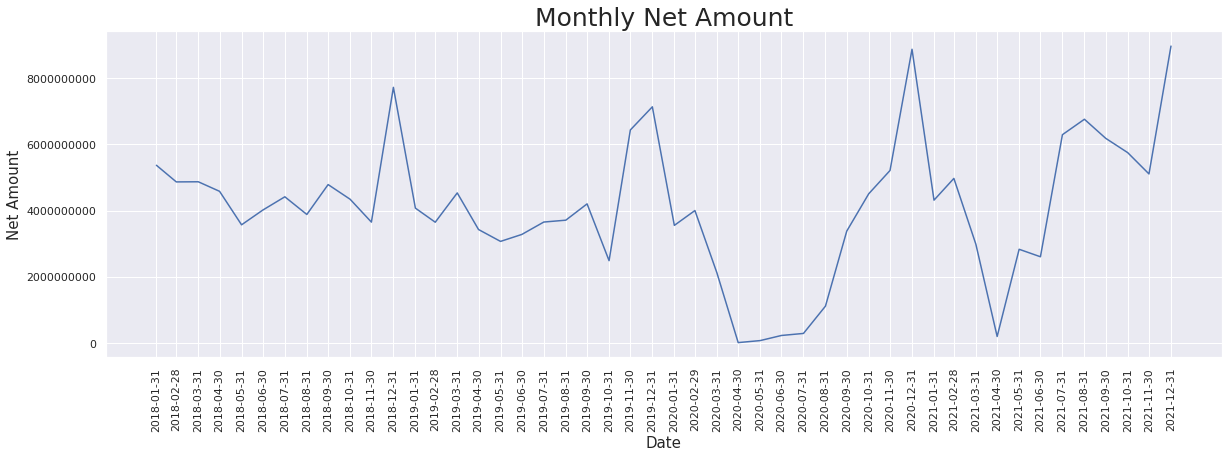

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_month.index, y=df_month['net_amount'])
plt.title('Monthly Net Amount', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=df_month.index, rotation=90)
plt.show()

### All Stores 'net_amount' by Day

In [27]:
# Filter Date and Net Amount, then group (Sum) by Date (Day) 
df_day = df[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()

In [28]:
df_day.head()

,date,net_amount
0,2018-01-02,211651799
1,2018-01-03,192176102
2,2018-01-04,205290820
3,2018-01-05,203690552
4,2018-01-06,253437249


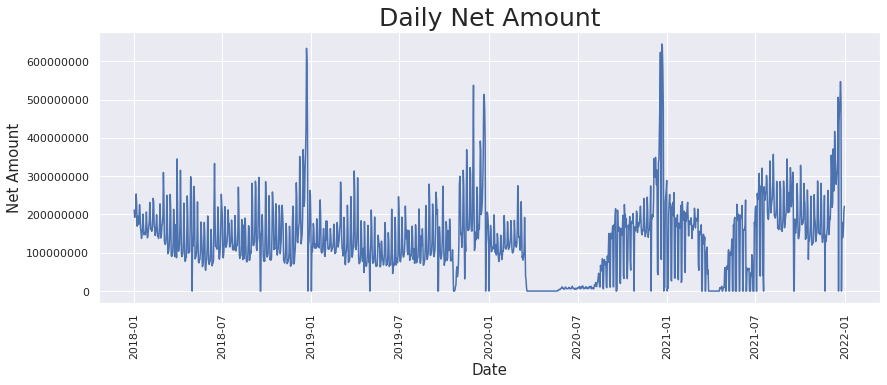

In [29]:
plt.figure(figsize=(14,5))
sns.lineplot(x='date', y='net_amount', data= df_day)
plt.title('Daily Net Amount', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Filtering Out the COVID Event

In [30]:
# Filtering Out the COVID Event
df_no_covid = df_month[(df_month.index < '2020-04-30') | (df_month.index > '2020-08-31')]
df_no_covid

,net_amount
date,
2018-01-31,5370389293
2018-02-28,4866856684
2018-03-31,4870822254
2018-04-30,4581535920
2018-05-31,3567313725
2018-06-30,4014537551
2018-07-31,4415839587
2018-08-31,3880818799
2018-09-30,4785892552


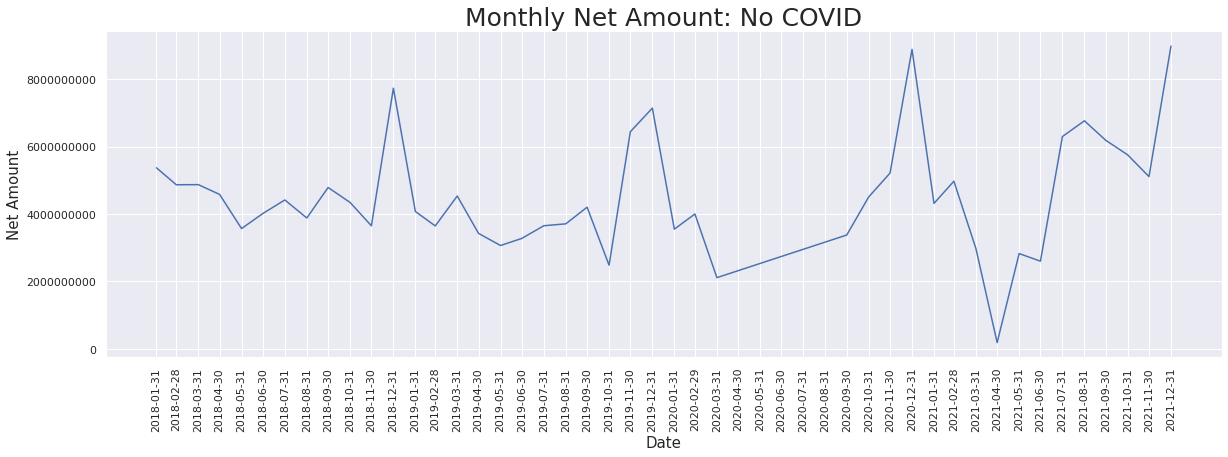

In [31]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_no_covid.index, y=df_no_covid['net_amount'])
plt.title('Monthly Net Amount: No COVID', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=df_month.index, rotation=90)
plt.show()

### Each Store 'net_amount' by Month 

In [32]:
df_per_store = df.groupby(by=['store', pd.Grouper(key= 'date', freq='M')]).sum()

In [33]:
df_per_store

net_amount
store  date                  
*CL905 2018-10-31       21373
CL104  2018-01-31   215077154
       2018-02-28   172819310
       2018-03-31   114069808
       2018-04-30   111274459
...                       ...
CL912  2020-12-31    78857365
CL914  2021-05-31   240104982
       2021-06-30   162413378
       2021-07-31   336226308
       2021-08-31    82288340

[2102 rows x 1 columns]

In [34]:
df_per_store.reset_index(inplace=True)

In [35]:
df_per_store.sort_values(by='date', ascending=False)['store'].unique()

array(['CL172', 'CL142', 'CL310', 'CL115', 'CL312', 'CL149', 'CL119',
       'CL124', 'CL317', 'CL186', 'CL153', 'CL105', 'CL173', 'CL184',
       'CL179', 'CL314', 'CL137', 'CL305', 'CL135', 'CL311', 'CL123',
       'CL158', 'CL111', 'CL154', 'CL308', 'CL307', 'CL148', 'CL313',
       'CL159', 'CL156', 'CL136', 'CL202', 'CL155', 'CL131', 'CL315',
       'CL118', 'CL145', 'CL910', 'CL171', 'CL121', 'CL157', 'CL187',
       'CL151', 'CL306', 'CL152', 'CL141', 'CL914', 'CL144', 'CL185',
       'CL302', 'CL180', 'CL907', 'CL911', 'CL178', 'CL912', 'CL128',
       'CL182', 'CL143', 'CL909', 'CL908', 'CL125', 'CL901', 'CL104',
       'CL117', 'CL904', 'CL132', 'CL905', 'CL150', 'CL177', 'CL120',
       'CL906', 'CL146', 'CL126', '*CL905', 'CL113', 'CL139', 'CL903',
       'CL112'], dtype=object)

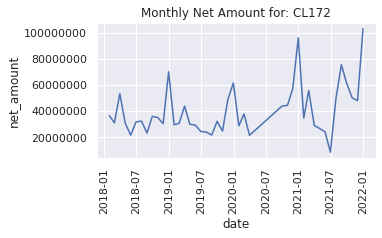

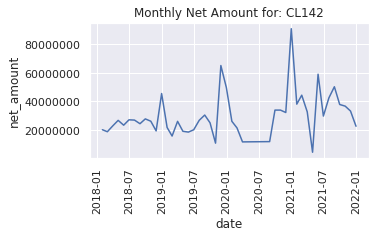

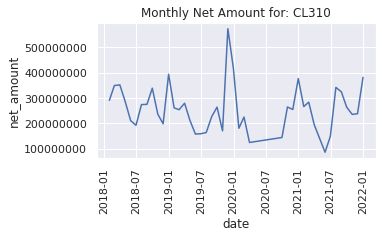

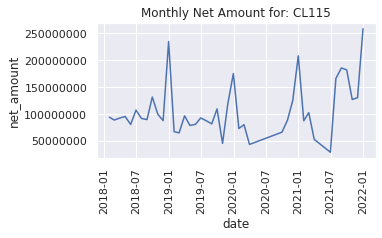

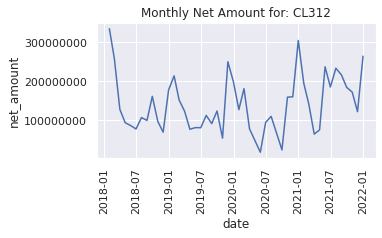

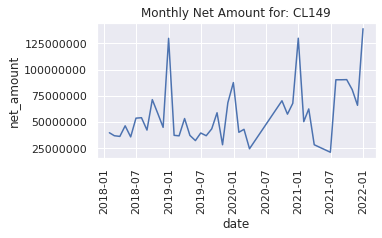

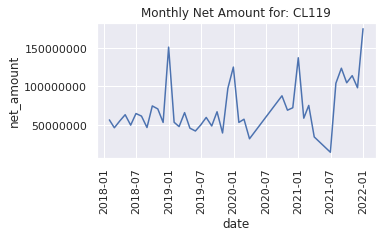

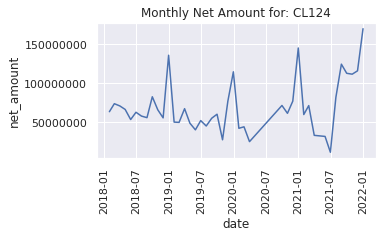

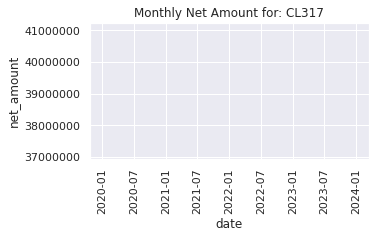

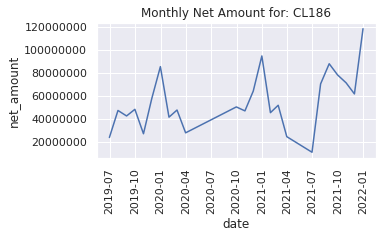

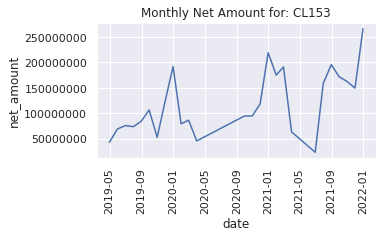

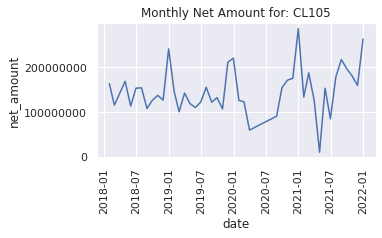

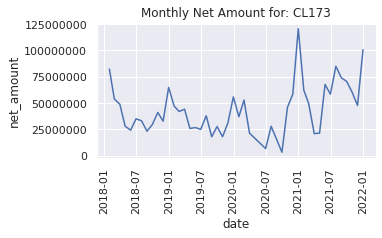

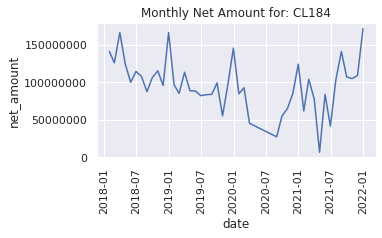

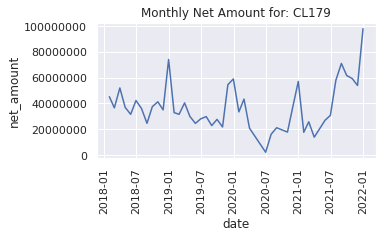

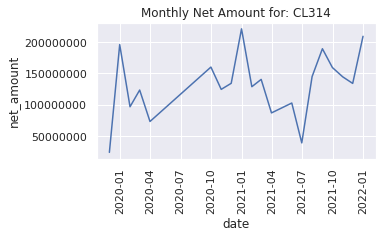

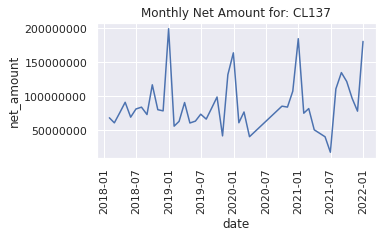

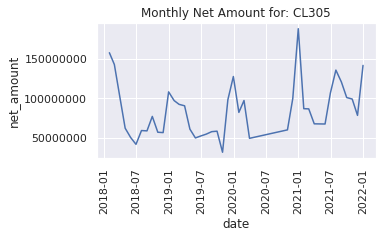

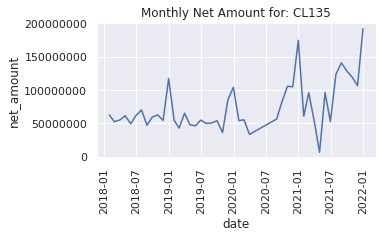

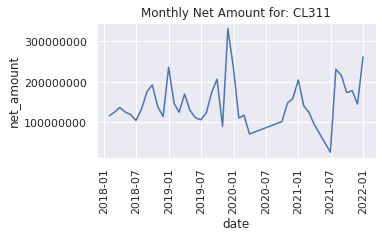

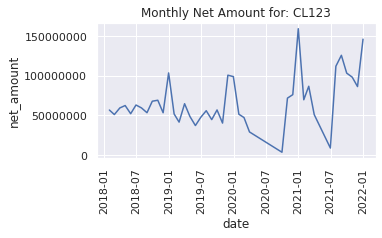

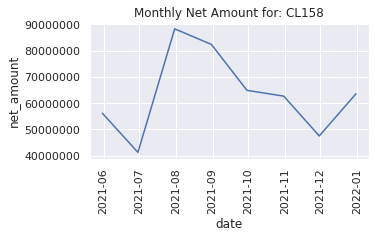

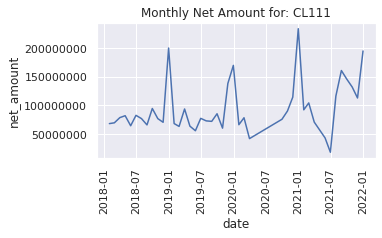

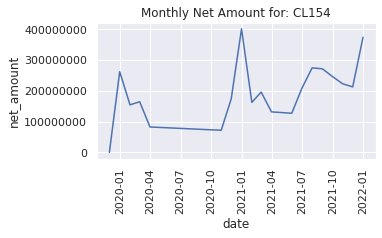

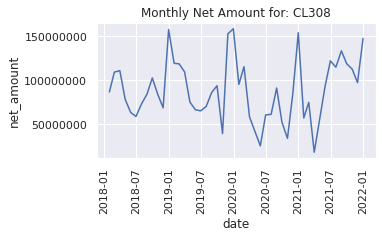

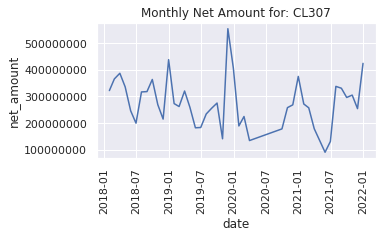

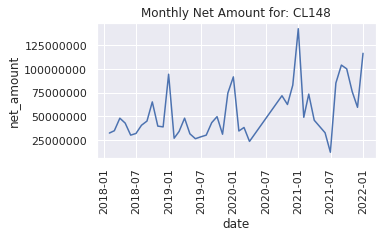

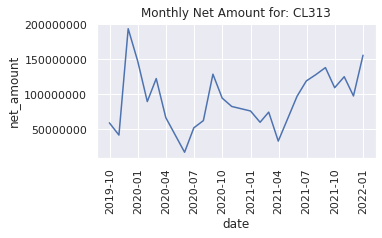

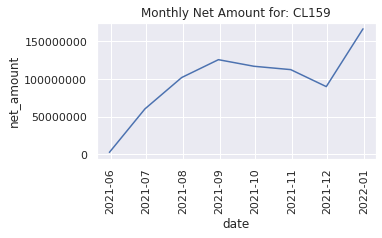

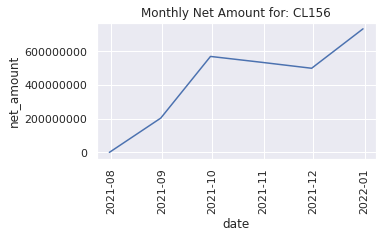

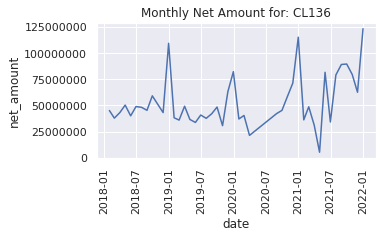

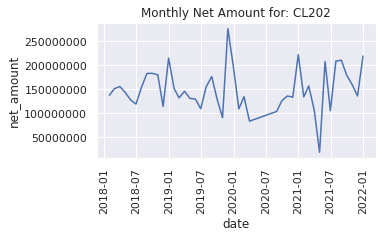

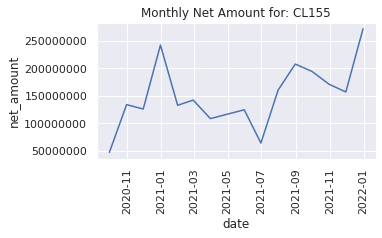

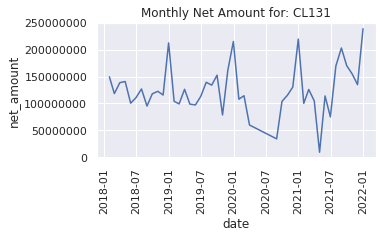

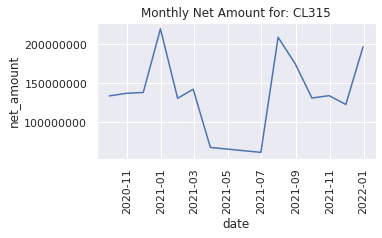

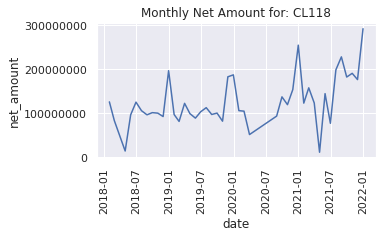

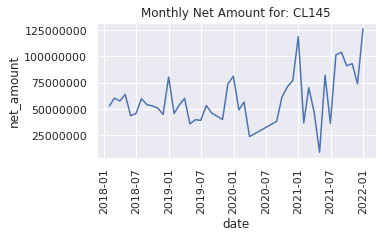

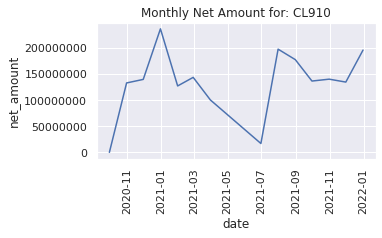

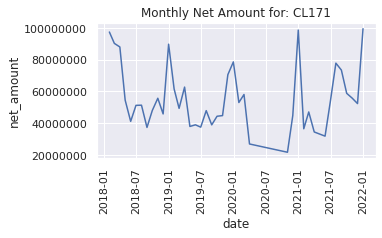

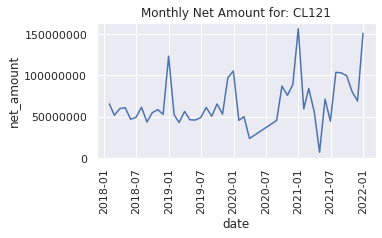

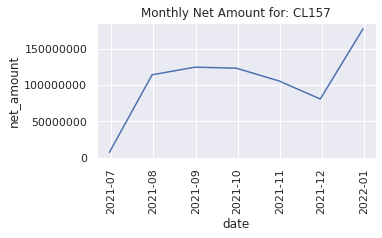

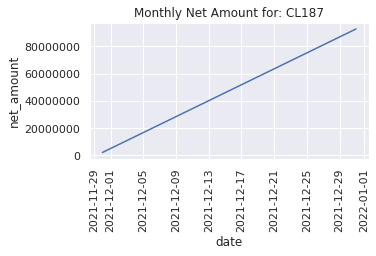

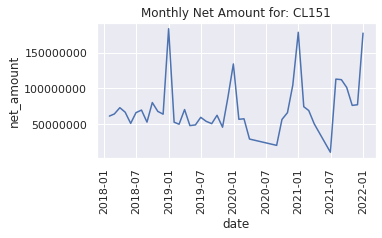

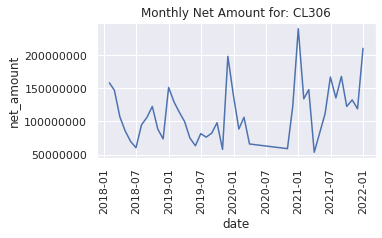

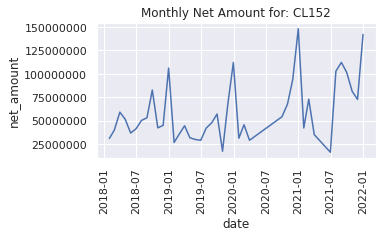

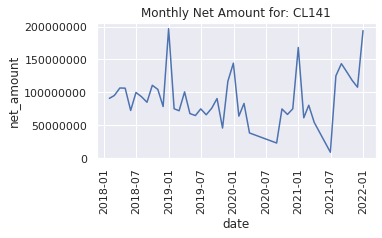

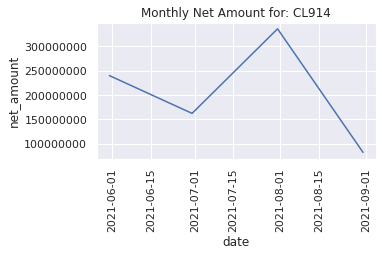

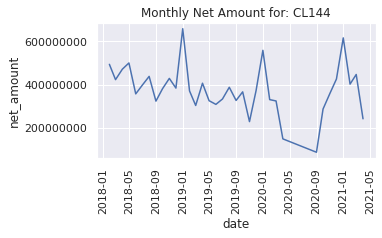

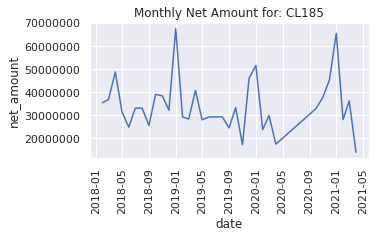

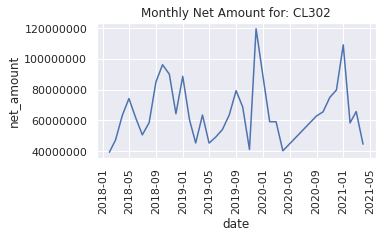

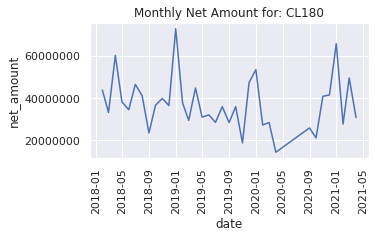

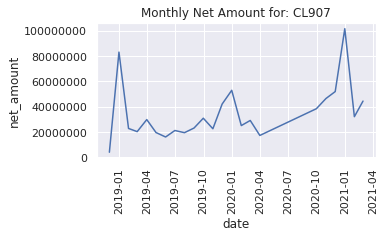

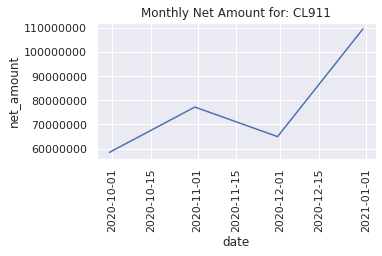

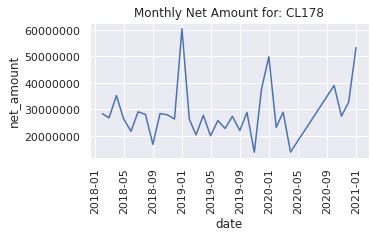

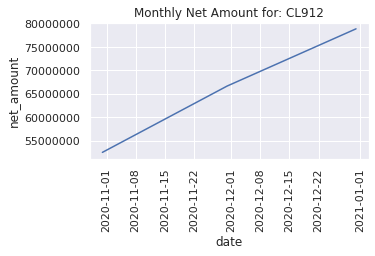

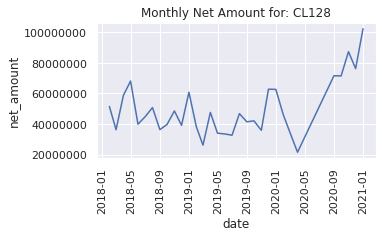

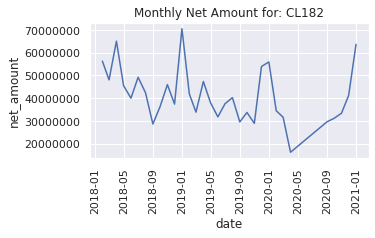

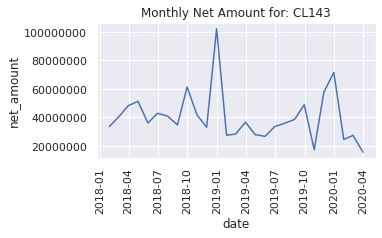

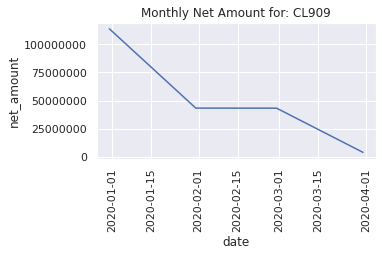

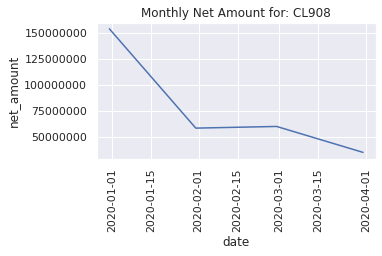

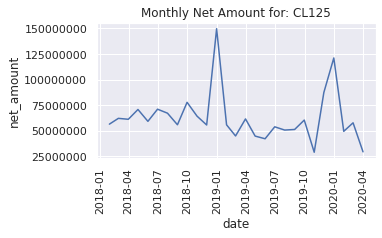

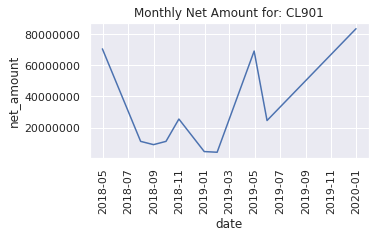

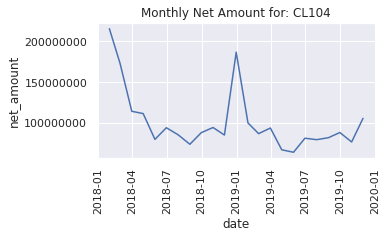

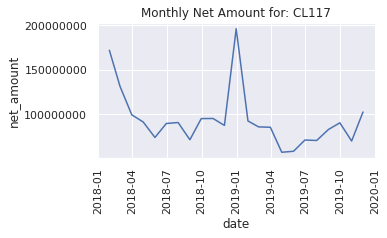

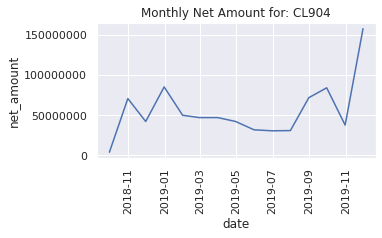

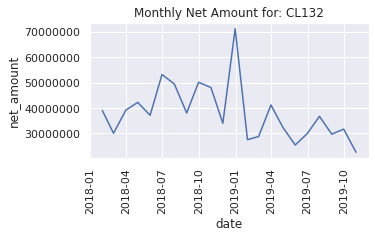

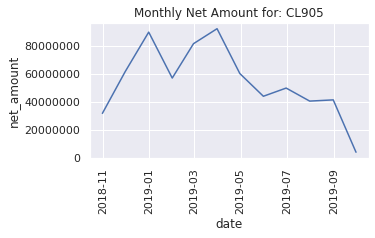

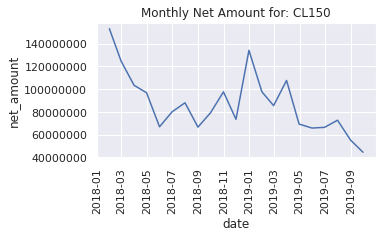

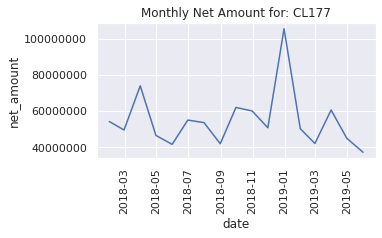

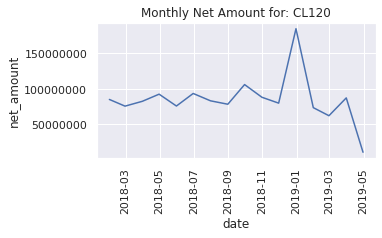

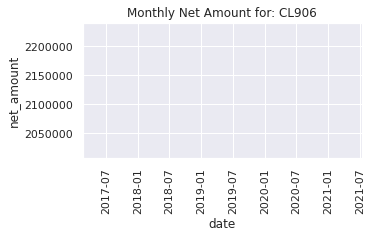

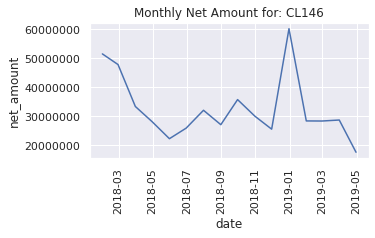

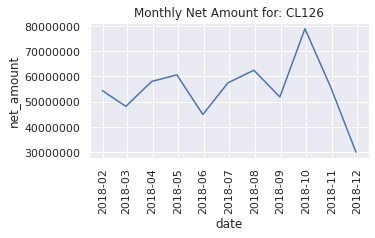

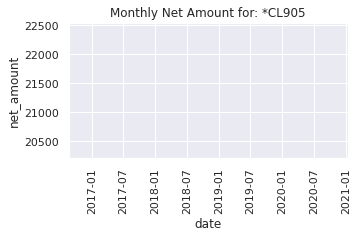

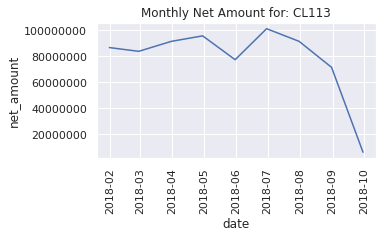

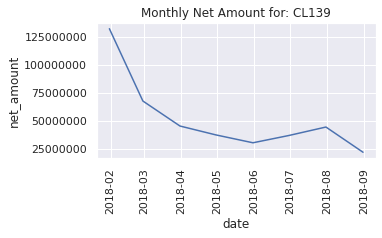

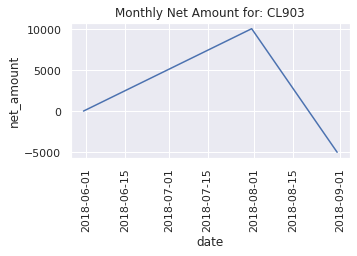

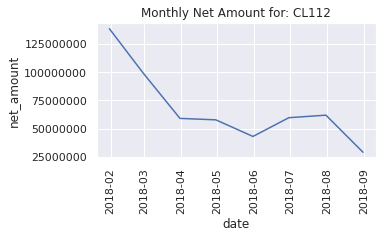

In [36]:
# Sorted by Active Stores (Descending)
for store_iter in df_per_store.sort_values(by='date', ascending=False)['store'].unique(): 
  plt.figure(figsize=(5,2.5))
  sns.lineplot(x='date', y='net_amount', data= df_per_store[df_per_store.store == store_iter], legend=None)
  plt.title('Monthly Net Amount for: ' + store_iter)
  plt.xticks(rotation=90)
  plt.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
  plt.show()

## Daily 'net_amount' Distribution for Outliers Detection

In [37]:
net_amount = df['net_amount']

### Method #1

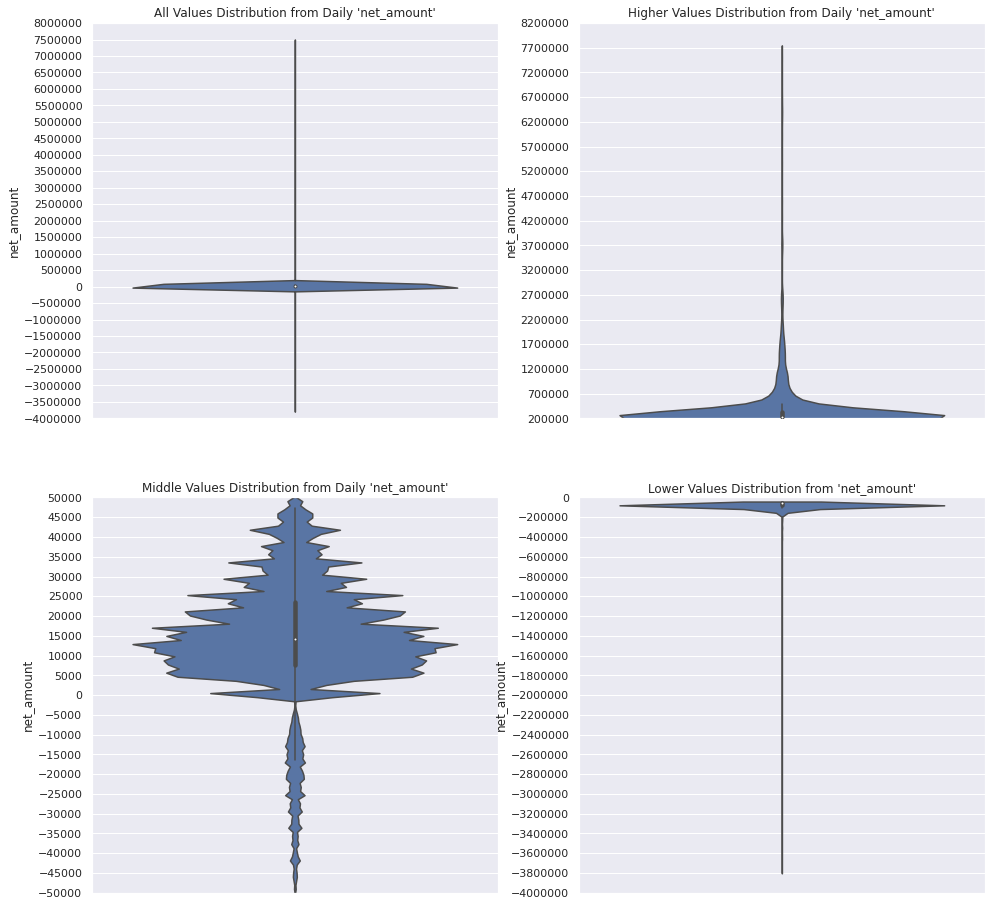

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

#1 - All values from 'net_amount'
sns.violinplot(ax=axs[0,0] , y=net_amount)
axs[0,0].set_title("All Values Distribution from Daily 'net_amount'")
axs[0,0].ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
axs[0,0].set_ylim(-4000000,8000000)
axs[0,0].set_yticks(range(-4000000,8500000, 500000))
    
#2 - Top values from 'net_amount'
bottom_range = 200000
top_range = 8200000
step = 500000 

sns.violinplot(ax=axs[0,1] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[0,1].set_title("Higher Values Distribution from Daily 'net_amount'")
axs[0,1].ticklabel_format(style='plain', axis='y')
axs[0,1].set_ylim(bottom_range, top_range)
axs[0,1].set_yticks(range(bottom_range, top_range+step, step))

#3 - Middle values from 'net_amount'
bottom_range = -50000
top_range = 50000
step = 5000

sns.violinplot(ax=axs[1,0] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[1,0].set_title("Middle Values Distribution from Daily 'net_amount'")
axs[1,0].ticklabel_format(style='plain', axis='y')
axs[1,0].set_ylim(bottom_range, top_range)
axs[1,0].set_yticks(range(bottom_range, top_range+step, step))

#4 - Bottom values from 'net_amount'
bottom_range = -4000000
top_range = -50000
step = 200000 

sns.violinplot(ax=axs[1,1] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[1,1].set_title("Lower Values Distribution from 'net_amount'")
axs[1,1].ticklabel_format(style='plain', axis='y')
axs[1,1].set_ylim(bottom_range, top_range)
axs[1,1].set_yticks(range(bottom_range, top_range+step, step))

plt.show()

### Method #2

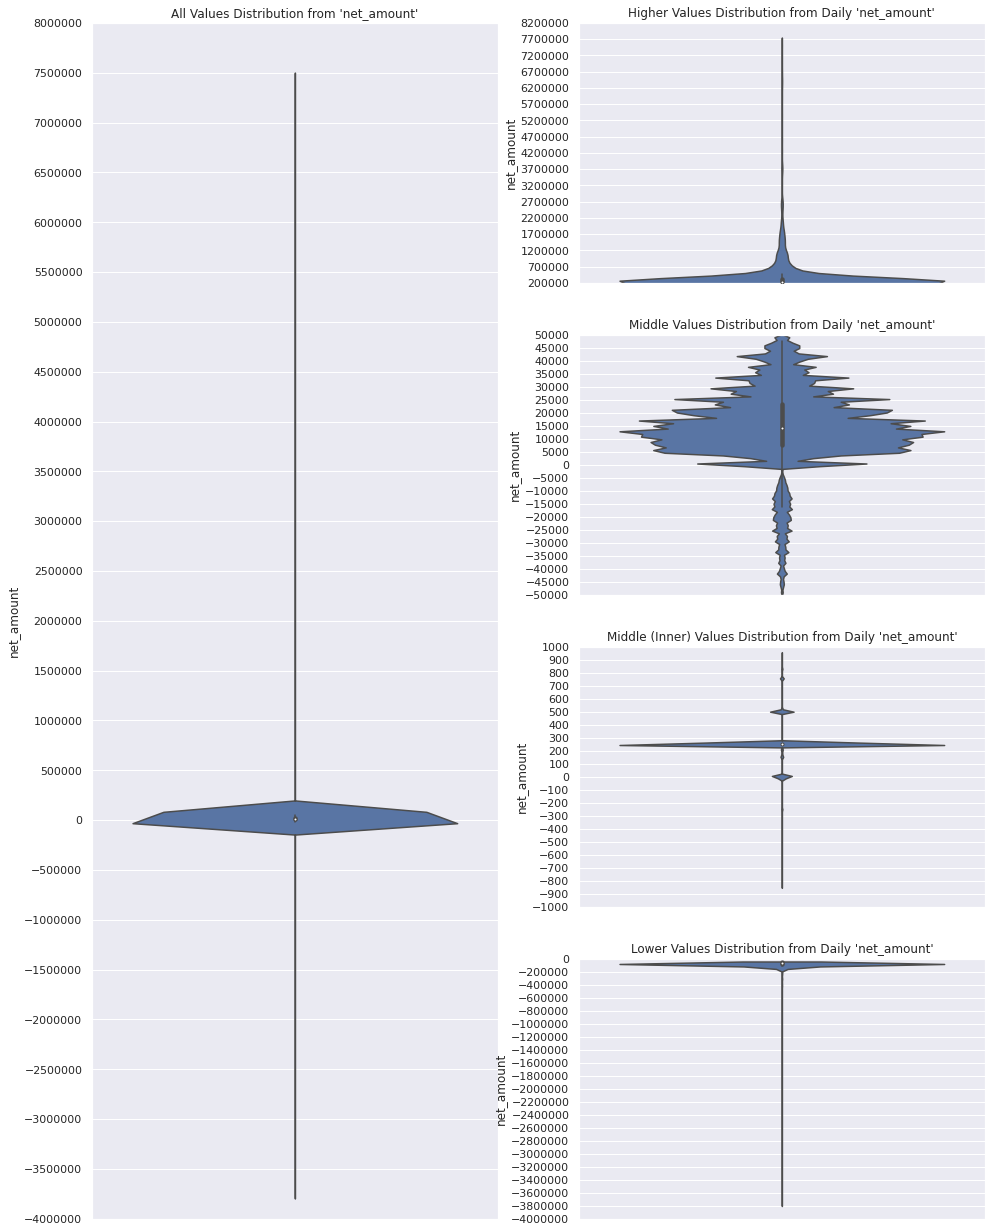

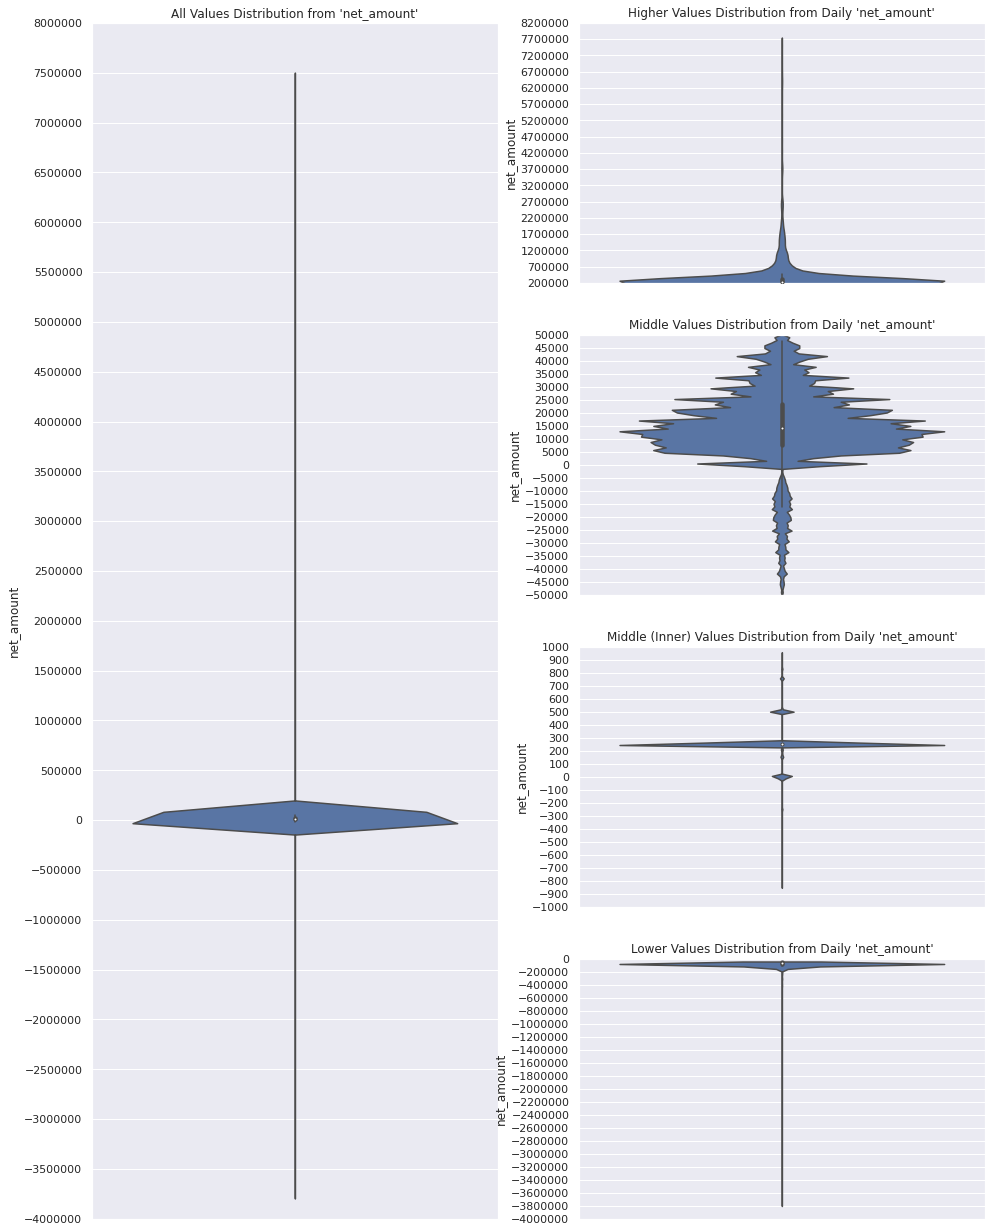

In [125]:
fig = plt.figure(figsize=(16,22))

ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(422)   
ax3 = fig.add_subplot(424)
ax4 = fig.add_subplot(426)   
ax5 = fig.add_subplot(428)

#1 - All values from 'net_amount'
bottom_range = -4000000
top_range = 8000000
step = 500000

sns.violinplot(ax=ax1 , y=net_amount)
ax1.set_title("All Values Distribution from 'net_amount'")
ax1.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
ax1.set_ylim(bottom_range, top_range)
ax1.set_yticks(range(bottom_range, top_range+step, step))
    
#2 - Top values from 'net_amount'
bottom_range = 200000
top_range = 8200000
step = 500000 

sns.violinplot(ax=ax2 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax2.set_title("Higher Values Distribution from Daily 'net_amount'")
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylim(bottom_range, top_range)
ax2.set_yticks(range(bottom_range, top_range+step, step))

#3 - Middle values from 'net_amount'
bottom_range = -50000
top_range = 50000
step = 5000

sns.violinplot(ax=ax3 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax3.set_title("Middle Values Distribution from Daily 'net_amount'")
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_ylim(bottom_range, top_range)
ax3.set_yticks(range(bottom_range, top_range+step, step))

#4 - Middle (Inner) values from 'net_amount'
bottom_range = -1000
top_range = 1000
step = 100

sns.violinplot(ax=ax4 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax4.set_title("Middle (Inner) Values Distribution from Daily 'net_amount'")
ax4.ticklabel_format(style='plain', axis='y')
ax4.set_ylim(bottom_range, top_range)
ax4.set_yticks(range(bottom_range, top_range+step, step))

#5 - Bottom values from 'net_amount'
bottom_range = -4000000
top_range = -50000
step = 200000 

sns.violinplot(ax=ax5 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax5.set_title("Lower Values Distribution from Daily 'net_amount'")
ax5.ticklabel_format(style='plain', axis='y')
ax5.set_ylim(bottom_range, top_range)
ax5.set_yticks(range(bottom_range, top_range+step, step))

plt.show()

## Daily 'net_amount' per Store Distribution for Outliers Detection

In [40]:
net_amount_stores = df[['net_amount','store']].sort_values(by='net_amount', ascending=False)

In [41]:
net_amount_stores 

,net_amount,store
6337910,7499500,CL901
10703010,6718487,CL105
6779857,6428143,CL901
6337911,6428143,CL901
6337909,6213871,CL901
...,...,...
92373,-1560035,CL111
105105,-2073929,CL111
92386,-2073929,CL111
92379,-2422644,CL111


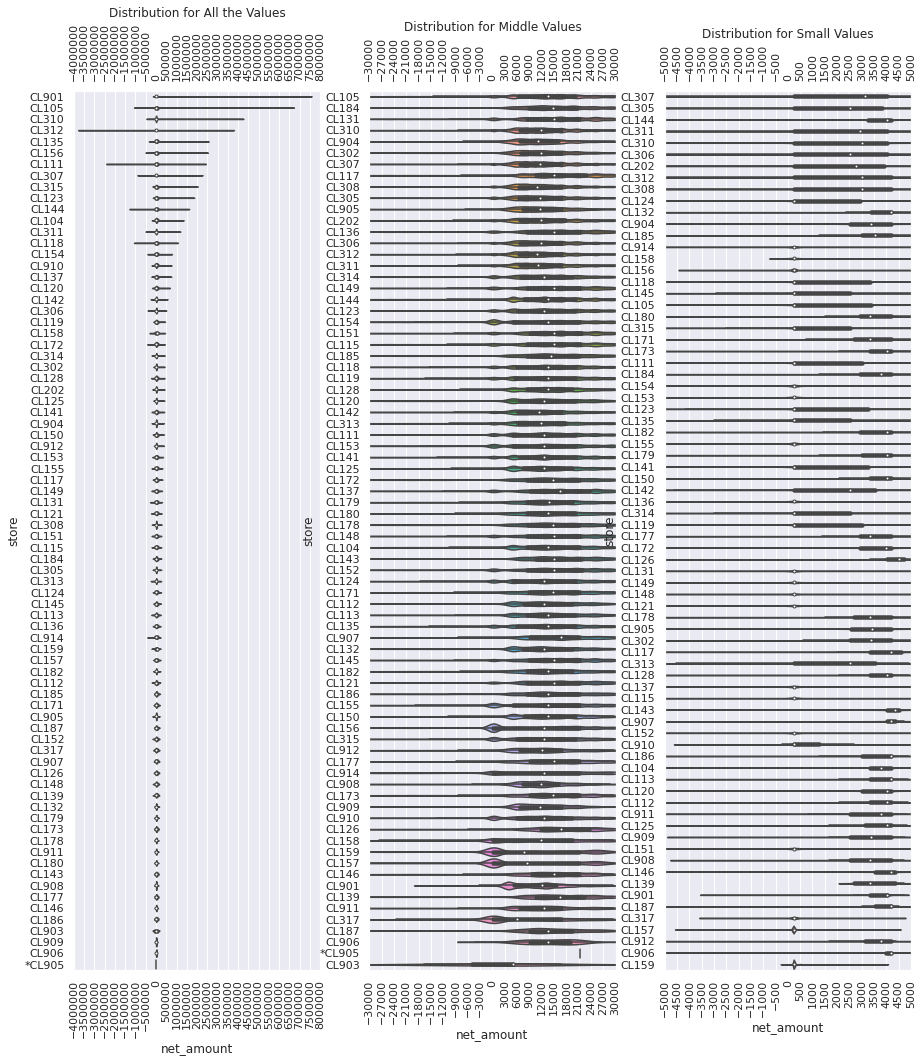

In [123]:
# Distribution of Daily "net_amount" for All Stores in Different Ranges

from matplotlib import axis
fig = plt.figure(figsize=(15,55))

ax1 = fig.add_subplot(331) 
ax2 = fig.add_subplot(332)   
ax3 = fig.add_subplot(333)  

# Big Picture - (No Zoom)
bottom_range = -4000000
top_range = 8000000
step = 500000

sns.violinplot(y='store', x='net_amount', data= net_amount_stores , ax=ax1) 
ax1.set_title('Distribution for All the Values')
ax1.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax1.set_xlim(bottom_range, top_range)
ax1.set_xticks(range(bottom_range, top_range+step, step))
ax1.tick_params(axis='x', labelrotation=90, labeltop=True)

# Medium Picture (Zooming to check the Distribution for Middle Values)
bottom_range = -30000
top_range = 30000
step = 3000

sns.violinplot(y='store', x='net_amount', ax=ax2, data= net_amount_stores[(net_amount_stores['net_amount'] >= bottom_range) & (net_amount_stores['net_amount'] <= top_range)]) 
ax2.set_title('Distribution for Middle Values')
ax2.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax2.set_xlim(bottom_range, top_range)
ax2.set_xticks(range(bottom_range, top_range+step, step))
ax2.tick_params(axis='x', labelrotation=90, labeltop=True)

# Small Picture (Zooming to Check the Distribution for Small Values)
bottom_range = -5000
top_range = 5000
step = 500

sns.violinplot(y='store', x='net_amount', ax=ax3, data= net_amount_stores[(net_amount_stores['net_amount'] >= bottom_range) & (net_amount_stores['net_amount'] <= top_range)]) 
ax3.set_title('Distribution for Small Values')
ax3.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax3.set_xlim(bottom_range, top_range)
ax3.set_xticks(range(bottom_range, top_range+step, step))
ax3.tick_params(axis='x', labelrotation=90, labeltop=True)

plt.show()

## Number of Open Stores by Date

In [43]:
# Open Stores by Date
active_stores_date = df.groupby(pd.Grouper(key= 'date', freq='M'))['store'].nunique()

In [44]:
active_stores_date.head()

date
2018-01-31    52
2018-02-28    52
2018-03-31    51
2018-04-30    53
2018-05-31    53
Freq: M, Name: store, dtype: int64

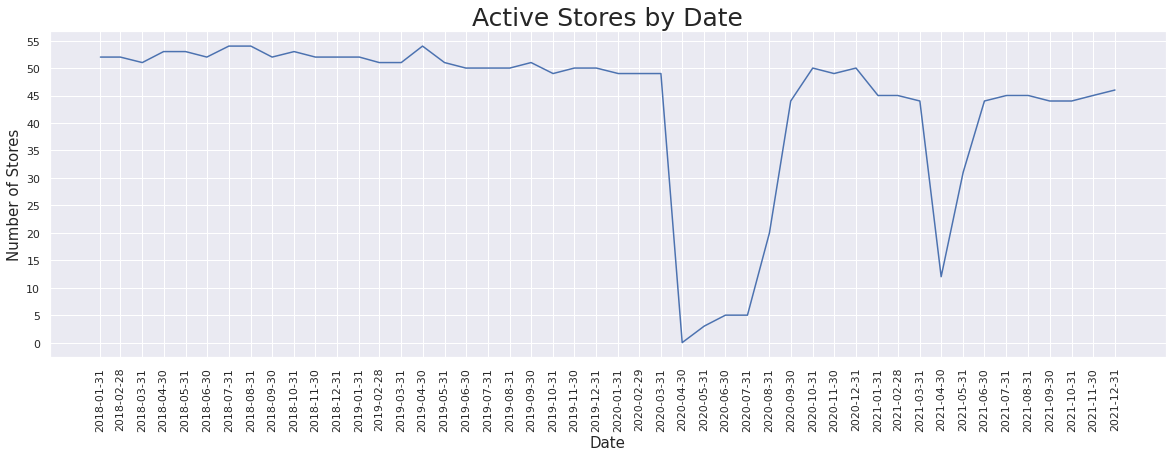

In [45]:
plt.figure(figsize=(20,6))
plt.plot(active_stores_date.index, active_stores_date)
plt.title('Active Stores by Date', fontsize=25)
#X Axis
plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=active_stores_date.index, rotation=90)
#Y Axis
plt.ylabel('Number of Stores', fontsize=15)
plt.yticks(range(0,60, 5))

plt.show()

## Stores with Higher Sales (Net Amount)

In [46]:
store_sales = df.groupby(['store'])[['net_amount']].agg('sum').sort_values(['net_amount'],ascending=False)

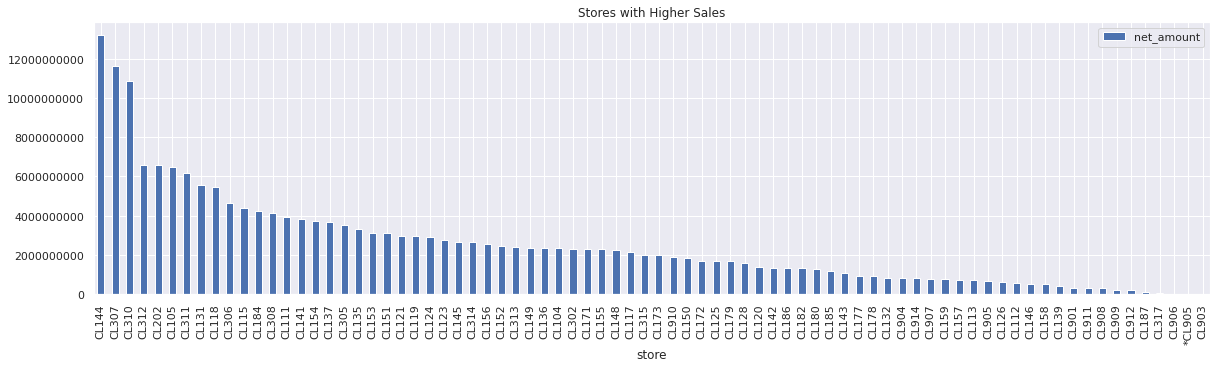

In [47]:
store_sales.plot.bar(figsize=(20,5), title='Stores with Higher Sales')
plt.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation

# Modelling with Prophet

## Prophet Pre-Modelling

In [48]:
df_prophet = df.copy()

In [49]:
# Higher Outliers Values
qup = df['net_amount'].quantile(0.999995)

# Lower Outliers Values
qdown = df['net_amount'].quantile(0.000001)

In [50]:
# Filters

#df_prophet = df_prophet[(df_prophet.date < '2020-03-14') | (df_prophet.date > '2020-08-13')]
#print (f'Shape After Filtering out COVID          : {df_prophet.shape}')

df_prophet = df_prophet[df_prophet.store != '*CL905']
print (f'Shape After Filtering out Store: *CL905  : {df_prophet.shape}')

#df_prophet = df_prophet[df_prophet.net_amount != 0]
#print (f"Shape After Filtering out 0's            : {df_prophet.shape}")

#df_prophet = df_prophet[df_prophet.store.isin (df_2022['store'].unique())]
#print (f"Shape After Filtering out Inactive Stores: {df_prophet.shape}")

#df_prophet = df_prophet[df_prophet.date.dt.year >= 2020]
#print (f"Shape After Filtering out 2018 & 2019    : {df_prophet.shape}")

#df_prophet = df_prophet[(df_prophet.net_amount < qup) & (df_prophet.net_amount > qdown)]
#print (f"Shape After Filtering Outliers           : {df_prophet.shape}")

df_prophet = df_prophet[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()
print (f"Shape After Grouping by Day              : {df_prophet.shape}")

Shape After Filtering out Store: *CL905  : (11793727, 6)
Shape After Grouping by Day              : (1460, 2)


In [51]:
mean_2020 = df_prophet[df_prophet.date.dt.year == 2020]

In [52]:
mean_2020 = mean_2020['net_amount'][(mean_2020.date < '2020-03-14') | (mean_2020.date > '2020-08-13')]
mean_2020 = int(mean_2020.mean())
mean_2020

150799816

In [53]:
covid = df_prophet[(df_prophet.date >= '2020-03-14') & (df_prophet.date <= '2020-08-13')]

In [54]:
df_prophet.loc[covid.index, 'net_amount'] = mean_2020

In [55]:
df_prophet.loc[covid.index]

,date,net_amount
802,2020-03-14,150799816
803,2020-03-15,150799816
804,2020-03-16,150799816
805,2020-03-17,150799816
806,2020-03-18,150799816
...,...,...
950,2020-08-09,150799816
951,2020-08-10,150799816
952,2020-08-11,150799816
953,2020-08-12,150799816


## Dependencies

In [56]:
%pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640309 sha256=99d4dd89aef6aca155840b45857a2301f81318a740ee321c3415498d8b2c0039
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [57]:
from prophet import Prophet

## Defining 'ds' and 'y'

In [58]:
df_prophet = df_prophet.rename(columns={'date':'ds', 'net_amount':'y'})

In [59]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = m.make_future_dataframe(periods=365)

In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1820,2022-12-27,301923688.77,206959595.26,392659752.08
1821,2022-12-28,295626862.73,204528745.28,387311629.39
1822,2022-12-29,292139722.38,200845631.23,387757153.93
1823,2022-12-30,300205132.76,209117777.85,389268585.18
1824,2022-12-31,320464105.56,231199242.34,405676605.11


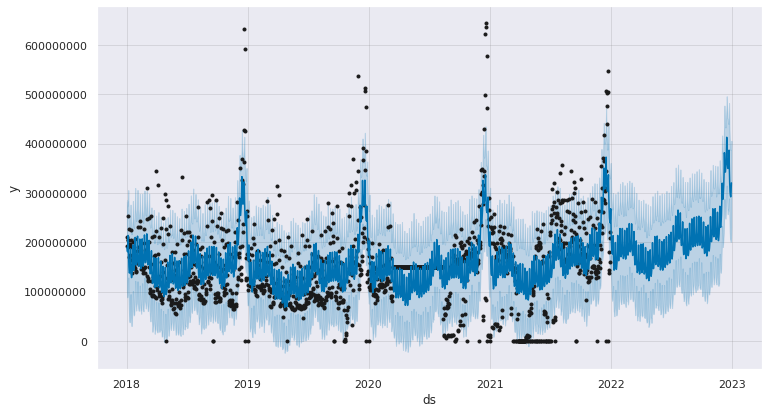

In [62]:
forecast_plot = m.plot(forecast)
plt.ticklabel_format(style='plain', axis='y') 

In [63]:
df_2022

,store,pos,date,net_amount,item,size
0,CL105,CL10501,2022-01-02,16798,GK9602,XL
1,CL306,CL30602,2022-01-02,11756,GL3727,S
2,CL306,CL30602,2022-01-02,12597,FT3154,XS
3,CL306,CL30602,2022-01-02,46210,GE0583,XL
4,CL306,CL30602,2022-01-02,-36126,FX2285,8.5
...,...,...,...,...,...,...
589331,CL153,CL15301,2022-03-14,7555,DZ9436,"S,"
589332,CL153,CL15301,2022-03-14,252,S49975,"NS,,,"
589333,CL153,CL15301,2022-03-14,54613,GA8928,"L,"
589334,CL153,CL15301,2022-03-14,67218,GW9999,"11-,"


In [64]:
df_2022_day = df_2022[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()

In [65]:
df_2022_day.head()

,date,net_amount
0,2022-01-02,174440294
1,2022-01-03,133676692
2,2022-01-04,140473972
3,2022-01-05,138025519
4,2022-01-06,139773611


## Evaluation


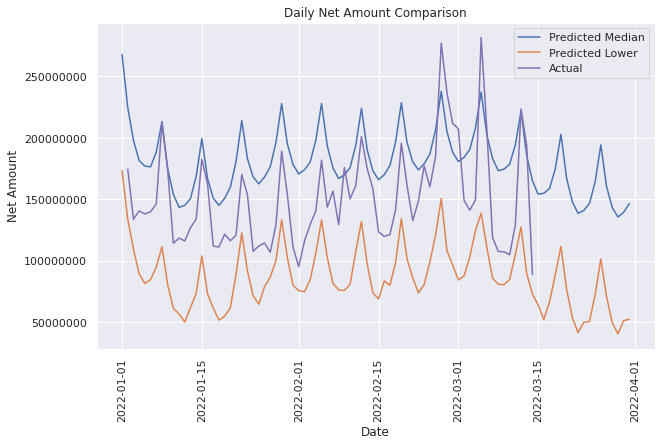

In [66]:
plt.figure(figsize=(10,6))
plt.title('Daily Net Amount Comparison')
sns.lineplot(data=forecast[(forecast.ds >= '2022-01') & (forecast.ds < '2022-04')], x='ds', y='yhat', label='Predicted Median')
sns.lineplot(data=forecast[(forecast.ds >= '2022-01') & (forecast.ds < '2022-04')], x='ds', y='yhat_lower', label='Predicted Lower')
sns.lineplot(data=df_2022_day, x='date', y='net_amount', color='C14',label='Actual')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Modelling with Sklearn

## Sklearn Pre-Modelling

In [67]:
df_preprocessed = df.copy()

In [68]:
# Higher Outliers Values
qup = df_preprocessed['net_amount'].quantile(0.999995)

# Lower Outliers Values
qdown = df_preprocessed['net_amount'].quantile(0.000001)

# Filtering External (Outliers) Values
df_preprocessed = df_preprocessed[(df_preprocessed.net_amount < qup) & (df_preprocessed.net_amount > qdown)]

active_stores = df.groupby(pd.Grouper(key= 'date', freq='M'))['store'].unique().reset_index().iloc[-1,1]
active_stores

array(['CL105', 'CL111', 'CL115', 'CL118', 'CL119', 'CL121', 'CL123',
       'CL124', 'CL131', 'CL135', 'CL136', 'CL137', 'CL141', 'CL142',
       'CL145', 'CL148', 'CL149', 'CL151', 'CL152', 'CL153', 'CL154',
       'CL155', 'CL156', 'CL157', 'CL158', 'CL159', 'CL171', 'CL172',
       'CL173', 'CL179', 'CL184', 'CL186', 'CL187', 'CL202', 'CL305',
       'CL306', 'CL307', 'CL308', 'CL310', 'CL311', 'CL312', 'CL313',
       'CL314', 'CL315', 'CL910', 'CL317'], dtype=object)

In [69]:
df_preprocessed = df.groupby(by=['store', pd.Grouper(key= 'date', freq='M')]).sum().reset_index()

In [70]:
# Filters

print (f'Shape After Grouping by Store and Day    : {df_preprocessed.shape}')

#df_preprocessed = df_preprocessed[(df_preprocessed.date < '2020-03-14') | (df_preprocessed.date > '2020-08-13')]
#print (f'Shape After Filtering out COVID          : {df_preprocessed.shape}')

df_preprocessed = df_preprocessed[df_preprocessed.store != '*CL905']
print (f'Shape After Filtering out Store: *CL905  : {df_preprocessed.shape}')

#df_preprocessed = df_preprocessed[df_preprocessed.net_amount != 0]
#print (f"Shape After Filtering out 0's            : {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[df_preprocessed.store.isin (df_2022['store'].unique())]
#print (f"Shape After Filtering out Inactive Stores: {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[df_preprocessed.date.dt.year >= 2020]
#print (f"Shape After Filtering out 2018 & 2019    : {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[(df_preprocessed.net_amount < qup) & (df_preprocessed.net_amount > qdown)]
#print (f"Shape After Filtering Outliers           : {df_preprocessed.shape}")


Shape After Grouping by Store and Day    : (2102, 3)
Shape After Filtering out Store: *CL905  : (2101, 3)


In [71]:
covid = df_preprocessed[(df_preprocessed.date >= '2020-03-14') & (df_preprocessed.date <= '2020-08-13')]

mean_2020 = df_preprocessed[df_preprocessed.date.dt.year == 2020]
mean_2020 = mean_2020['net_amount'][(mean_2020.date < '2020-03-14') | (mean_2020.date > '2020-08-13')]
mean_2020 = int(mean_2020.mean())
mean_2020

98505388

In [72]:
df_preprocessed.loc[covid.index, 'net_amount'] = mean_2020
df_preprocessed.loc[covid.index]

,store,date,net_amount
50,CL105,2020-03-31,98505388
94,CL111,2020-03-31,98505388
153,CL115,2020-03-31,98505388
216,CL118,2020-03-31,98505388
260,CL119,2020-03-31,98505388
...,...,...,...
1954,CL313,2020-07-31,98505388
1974,CL314,2020-03-31,98505388
2062,CL907,2020-03-31,98505388
2072,CL908,2020-03-31,98505388


## One Hot Encoding / Dummies

In [73]:
df_preprocessed.columns

Index(['store', 'date', 'net_amount'], dtype='object')

In [74]:
df_preprocessed['year'] = [str(l)[:4] for l in df_preprocessed['date']]
df_preprocessed['month'] = [str(l)[5:7] for l in df_preprocessed['date']]
df_preprocessed['day'] = [str(l)[8:10] for l in df_preprocessed['date']]

In [75]:
df_preprocessed.head()

,store,date,net_amount,year,month,day
1,CL104,2018-01-31,215077154,2018,01,31
2,CL104,2018-02-28,172819310,2018,02,28
3,CL104,2018-03-31,114069808,2018,03,31
4,CL104,2018-04-30,111274459,2018,04,30
5,CL104,2018-05-31,79728719,2018,05,31


In [76]:
df_preprocessed.dtypes

store                 object
date          datetime64[ns]
net_amount             int64
year                  object
month                 object
day                   object
dtype: object

In [77]:
df_dummies = pd.get_dummies(df_preprocessed.drop('date', axis=1))

In [78]:
df_dummies['year_2022'] = 0

In [79]:
organized_columns = ['net_amount', 'store_CL104', 'store_CL105', 'store_CL111',
       'store_CL112', 'store_CL113', 'store_CL115', 'store_CL117',
       'store_CL118', 'store_CL119', 'store_CL120', 'store_CL121',
       'store_CL123', 'store_CL124', 'store_CL125', 'store_CL126',
       'store_CL128', 'store_CL131', 'store_CL132', 'store_CL135',
       'store_CL136', 'store_CL137', 'store_CL139', 'store_CL141',
       'store_CL142', 'store_CL143', 'store_CL144', 'store_CL145',
       'store_CL146', 'store_CL148', 'store_CL149', 'store_CL150',
       'store_CL151', 'store_CL152', 'store_CL153', 'store_CL154',
       'store_CL155', 'store_CL156', 'store_CL157', 'store_CL158',
       'store_CL159', 'store_CL171', 'store_CL172', 'store_CL173',
       'store_CL177', 'store_CL178', 'store_CL179', 'store_CL180',
       'store_CL182', 'store_CL184', 'store_CL185', 'store_CL186',
       'store_CL187', 'store_CL202', 'store_CL302', 'store_CL305',
       'store_CL306', 'store_CL307', 'store_CL308', 'store_CL310',
       'store_CL311', 'store_CL312', 'store_CL313', 'store_CL314',
       'store_CL315', 'store_CL317', 'store_CL901', 'store_CL903',
       'store_CL904', 'store_CL905', 'store_CL906', 'store_CL907',
       'store_CL908', 'store_CL909', 'store_CL910', 'store_CL911',
       'store_CL912', 'store_CL914', 'year_2018', 'year_2019', 'year_2020',
       'year_2021', 'year_2022', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11',
       'month_12', 'day_28', 'day_29', 'day_30', 'day_31']

In [80]:
df_dummies = df_dummies[organized_columns]

In [81]:
df_dummies.dtypes

net_amount     int64
store_CL104    uint8
store_CL105    uint8
store_CL111    uint8
store_CL112    uint8
               ...  
month_12       uint8
day_28         uint8
day_29         uint8
day_30         uint8
day_31         uint8
Length: 99, dtype: object

In [82]:
df_dummies.head()

,net_amount,store_CL104,store_CL105,store_CL111,store_CL112,store_CL113,store_CL115,store_CL117,store_CL118,store_CL119,...,month_07,month_08,month_09,month_10,month_11,month_12,day_28,day_29,day_30,day_31
1,215077154,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,172819310,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,114069808,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,111274459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,79728719,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Dependencies

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Defining X, Y, Test and Train

In [84]:
x = df_dummies.drop('net_amount', axis=1)
y = df_dummies['net_amount']
print (f'{x.shape}\n {y.shape}')

(2101, 98)
 (2101,)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1680, 98) (421, 98) (1680,) (421,)


## Creating the Pipelines

In [86]:
# Useful to Train Multiple Models 
pipelines = {
    'ols':make_pipeline(LinearRegression()),
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

pipelines

{'enet': Pipeline(steps=[('elasticnet', ElasticNet(random_state=1234))]),
 'gb': Pipeline(steps=[('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=1234))]),
 'lasso': Pipeline(steps=[('lasso', Lasso(random_state=1234))]),
 'ols': Pipeline(steps=[('linearregression', LinearRegression())]),
 'rf': Pipeline(steps=[('randomforestregressor',
                  RandomForestRegressor(random_state=1234))]),
 'ridge': Pipeline(steps=[('ridge', Ridge(random_state=1234))])}

In [87]:
pipelines['ols'].get_params()

{'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False,
 'memory': None,
 'steps': [('linearregression', LinearRegression())],
 'verbose': False}

## Hyperparameter Grid

In [88]:
# To Optimize the Models
hypergrid = {
    'ols': {              
    },
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

## Training the Models

In [89]:
# Loop to Train the Models inside the Pipelines using the GridSearchCV for Model Optimization
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for ols.
ols has been successfully fit.
Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+17, tolerance: 1.071e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+18, tolerance: 1.071e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Evaluation

### Predict, Calculate r2 Score and Mean Absolute Error

In [90]:
# Save into a new DataFrame
df_model_evaluation = pd.DataFrame(columns=['Algo', 'R2 Score', 'Mean Absolute Error'])
index = 0

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))
    
    index += 1
    df_model_evaluation.loc[index] = [algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)]

ols scores - R2:0.7896915804613835 MAE:22803404.249406178
rf scores - R2:0.8013264314142395 MAE:20148223.625318844
gb scores - R2:0.7441353931653872 MAE:27263940.71018868
ridge scores - R2:0.7912507356965888 MAE:22615442.50310871
lasso scores - R2:0.7921450312161729 MAE:22653923.391606912
enet scores - R2:0.7915594902709228 MAE:22611336.20500707


In [91]:
# Sort Descending by R2 Score
df_model_evaluation = df_model_evaluation.sort_values(by='R2 Score', ascending=False).reset_index(drop= True)
df_model_evaluation

,Algo,R2 Score,Mean Absolute Error
0,rf,0.80,20148223.63
1,lasso,0.79,22653923.39
2,enet,0.79,22611336.21
3,ridge,0.79,22615442.50
4,ols,0.79,22803404.25
5,gb,0.74,27263940.71


### Graph Model Performance

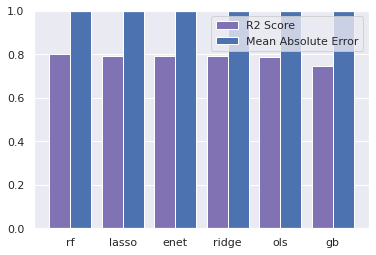

In [92]:
plt.clf()
barwidth = 0.4
x_plot_1 = df_model_evaluation.index
x_plot_2 = x_plot_1+barwidth
y_plot_1 = df_model_evaluation['R2 Score']
y_plot_2 = df_model_evaluation['Mean Absolute Error']
x_ticks = df_model_evaluation['Algo']

plt.bar(x_plot_1, y_plot_1, width=barwidth, color='C254', label= 'R2 Score')
plt.bar(x_plot_2, y_plot_2, width=barwidth, color='C250', label= 'Mean Absolute Error')
plt.xticks(x_plot_1+barwidth/2, x_ticks)
plt.ylim(0,1) 
plt.legend()
plt.show()

### Select the Best Model

In [93]:
best_model = df_model_evaluation.iloc[0,0]
best_model

'rf'

In [94]:
df_compare = pd.DataFrame()

In [95]:
df_compare['predicted'] = fit_models[best_model].predict(x_test)

In [96]:
df_compare['actual'] = np.array(y_test)

In [97]:
df_compare

,predicted,actual
0,123826025.97,185296032
1,136663128.92,98505388
2,93385587.79,64830400
3,101151818.12,84354685
4,145421584.76,23940540
...,...,...
416,203925417.97,207811288
417,26720466.94,26827307
418,89322447.82,60827400
419,38546435.18,46357572


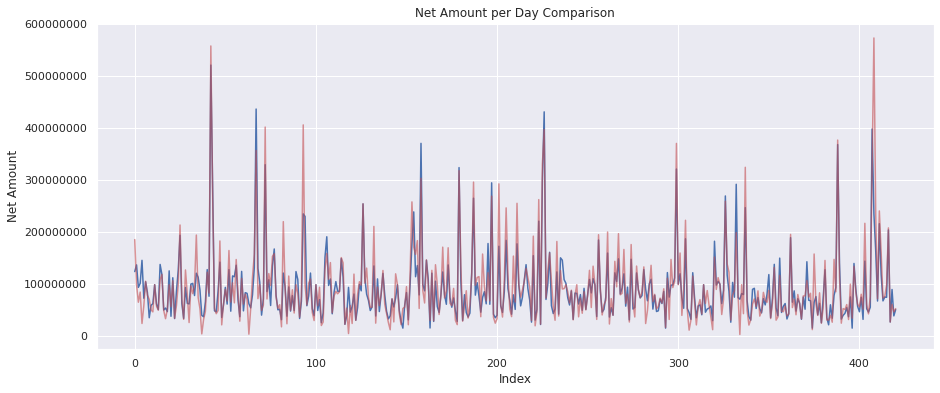

In [98]:
plt.figure(figsize=(15,6))
plt.title('Net Amount per Day Comparison')
sns.lineplot(data=df_compare, x=df_compare.index, y='predicted')
sns.lineplot(data=df_compare, x=df_compare.index, y='actual', color='r', alpha=0.6)
plt.ylabel('Net Amount')
plt.xlabel('Index')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

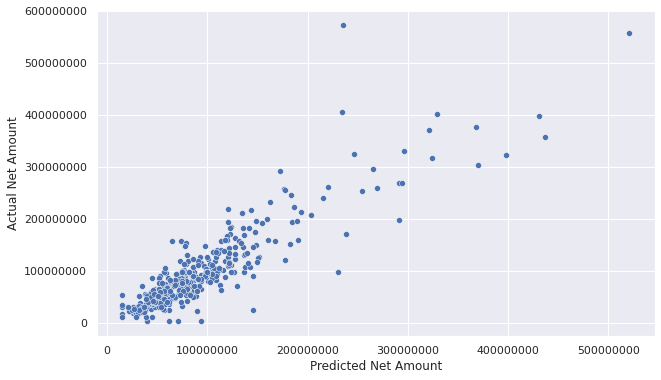

In [99]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_compare, x='predicted', y='actual')
plt.ylabel('Actual Net Amount')
plt.xlabel('Predicted Net Amount')
plt.ticklabel_format(style='plain', axis='both')
plt.show()

### Forward Test

In [100]:
# Copy 'sales_2022' Dataframe for Future Manipulation
df_ftest = df_2022.copy()

In [101]:
# Filtering the Incompleted Month of March 2022
df_ftest = df_ftest[df_ftest.date < '2022-03']

In [102]:
# Group by Month then split Date into Strings to create a Dummy DF (Categorical Data as 1's and 0's)
df_ftest = df_ftest.groupby(by=['store', pd.Grouper(key= 'date', freq='M')]).sum().reset_index()

df_ftest['year'] = [str(l)[:4] for l in df_ftest['date']]
df_ftest['month'] = [str(l)[5:7] for l in df_ftest['date']]
df_ftest['day'] = [str(l)[8:10] for l in df_ftest['date']]

In [103]:
df_ftest = df_ftest.set_index('date')

In [104]:
# Create Dummy as Input for the Model
df_ftest_dummies = pd.get_dummies(df_ftest)

In [105]:
# Sort by Date
df_ftest_dummies.sort_values(by='date', inplace=True)

In [106]:
df_ftest_dummies.head()

,net_amount,store_CL105,store_CL111,store_CL115,store_CL118,store_CL119,store_CL121,store_CL123,store_CL124,store_CL131,...,store_CL313,store_CL314,store_CL315,store_CL317,store_CL910,year_2022,month_01,month_02,day_28,day_31
date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,138035821,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2022-01-31,37951485,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2022-01-31,88338674,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2022-01-31,169743283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2022-01-31,95608862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


#### Organized the Input Columns to Match the Traning Dataframe

In [107]:
# Create the Organized Dummy Dataframe
df_ftest_dummies_organized = pd.DataFrame(columns=organized_columns)

In [108]:
# Match Columns between the Organized Dummy and the Non Organized Dummy and Fill Nulls with 0
df_ftest_dummies_organized = pd.concat([df_ftest_dummies_organized, df_ftest_dummies]).fillna(0)

In [109]:
# Making the Prediction
yhat_ft = fit_models[best_model].predict(df_ftest_dummies_organized.drop('net_amount', axis=1))

In [110]:
# Bringing Back the Original (Non-dummy) Input Dataframe and Sorting Values to Match Predictions
df_ftest.sort_values(by='date', inplace=True)

In [111]:
# Unifying DF and Predictions
df_ftest['predicted_net_amount'] = yhat_ft.astype(int)

In [112]:
df_ftest.columns

Index(['store', 'net_amount', 'year', 'month', 'day', 'predicted_net_amount'], dtype='object')

In [113]:
# Selecting Useful Columns
df_ftest = df_ftest[['store', 'net_amount', 'predicted_net_amount']].reset_index()

In [114]:
# Calculating the Difference in %
df_ftest['difference%'] = round((df_ftest['predicted_net_amount'] * 100) / df_ftest['net_amount'] - 100,2)

In [115]:
df_ftest.head()

,date,store,net_amount,predicted_net_amount,difference%
0,2022-01-31,CL105,138035821,147203326,6.64
1,2022-01-31,CL152,37951485,40127048,5.73
2,2022-01-31,CL153,88338674,83584520,-5.38
3,2022-01-31,CL154,169743283,92409429,-45.56
4,2022-01-31,CL155,95608862,74290208,-22.30


In [116]:
# Calculating the Mean Difference in %
df_ftest['difference%'].mean()

-7.085222222222222

#### Visualizing the Predictions and Actual Values for Each Store

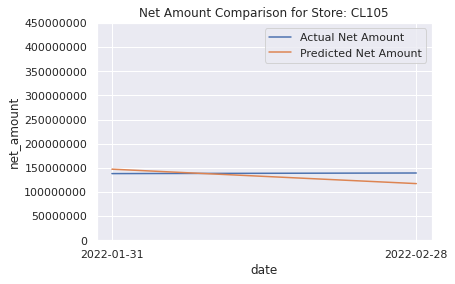

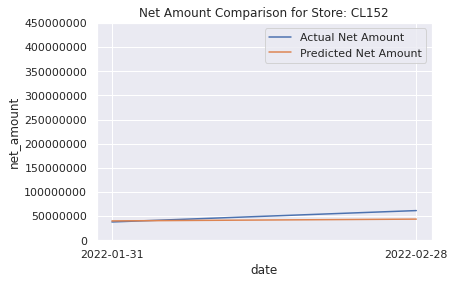

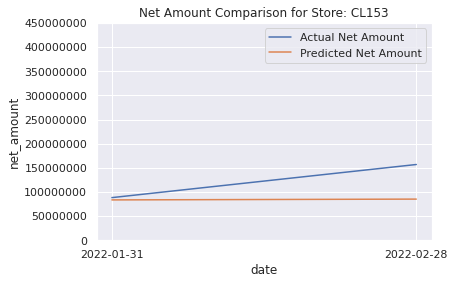

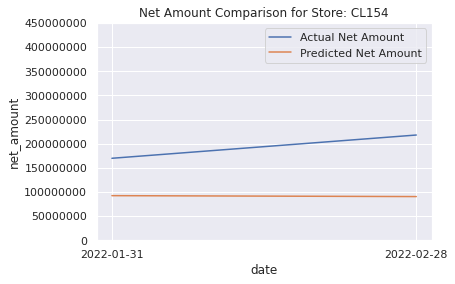

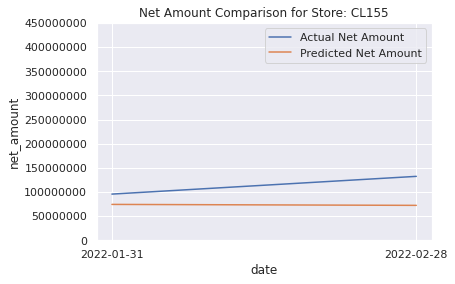

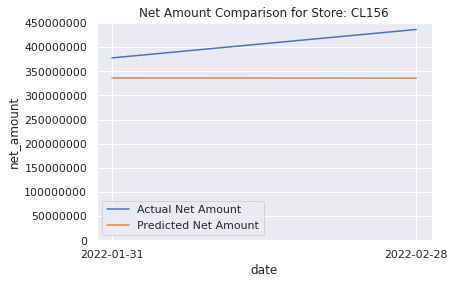

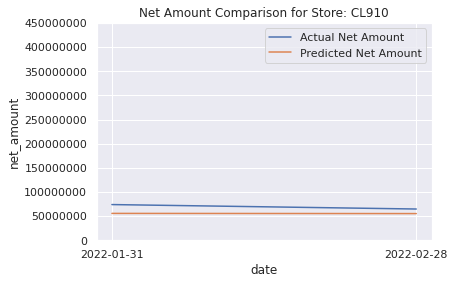

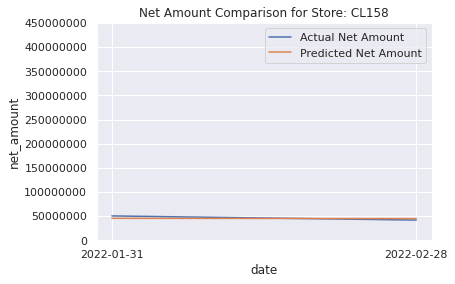

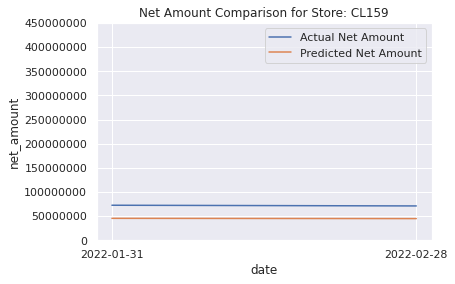

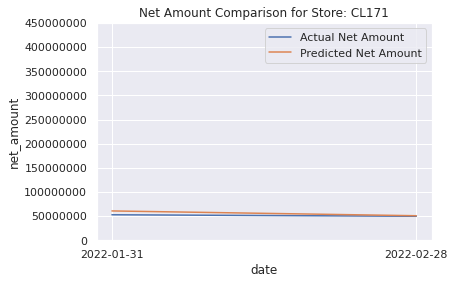

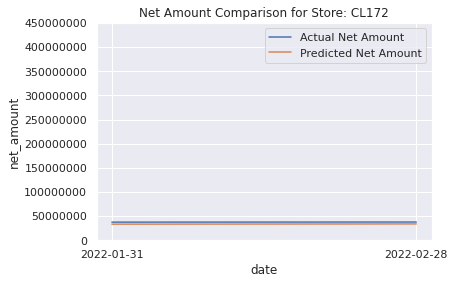

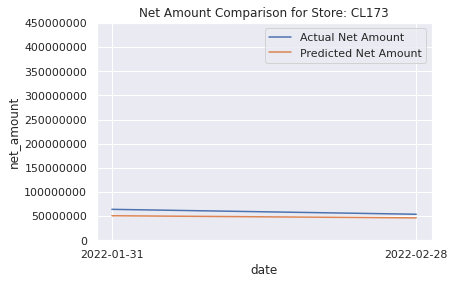

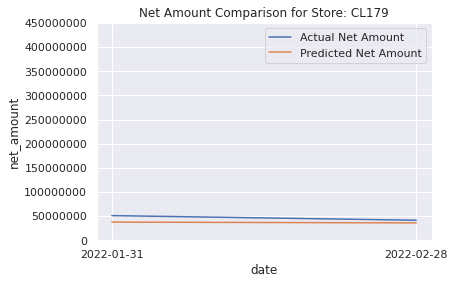

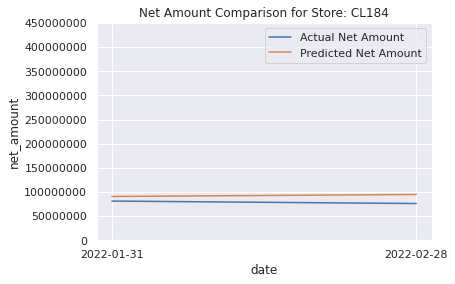

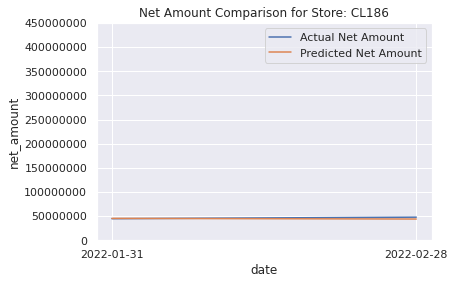

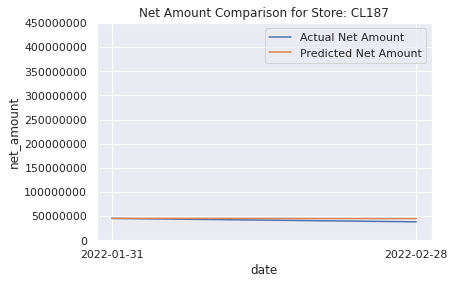

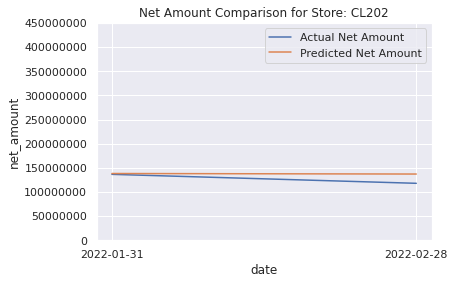

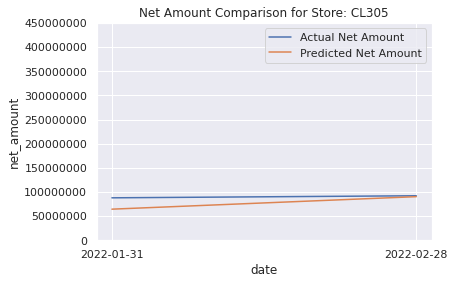

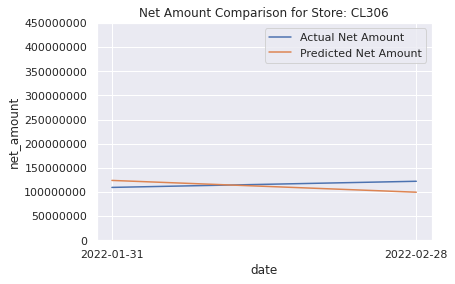

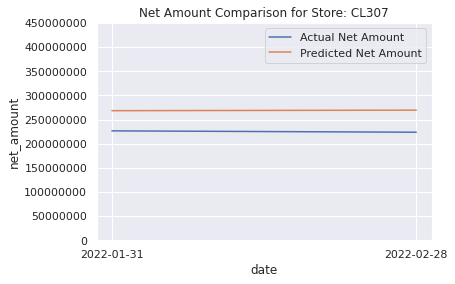

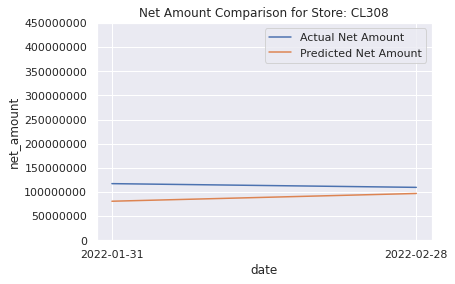

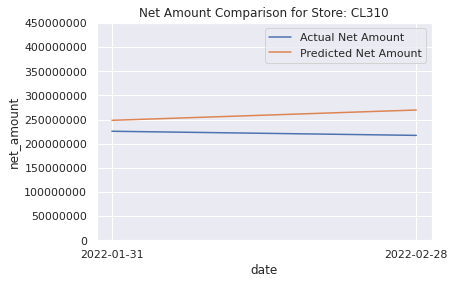

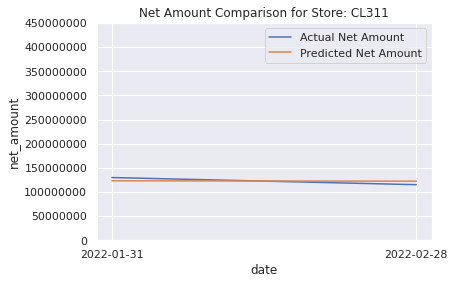

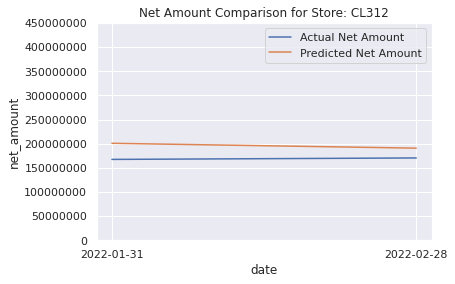

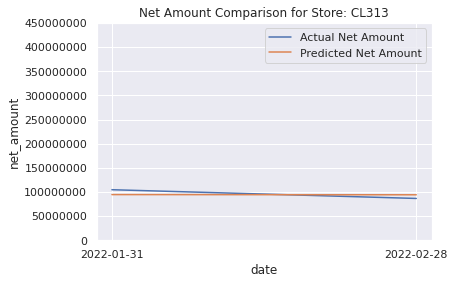

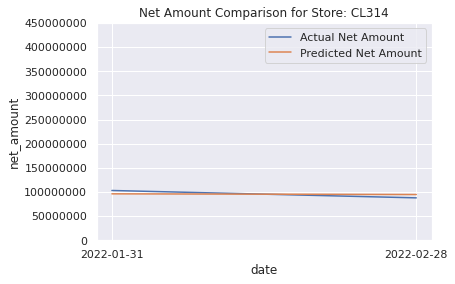

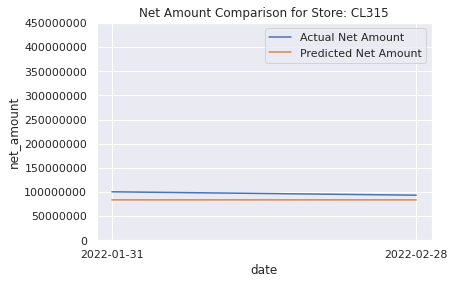

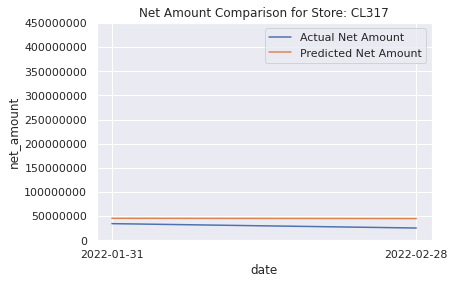

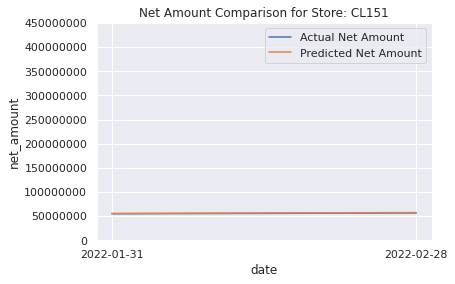

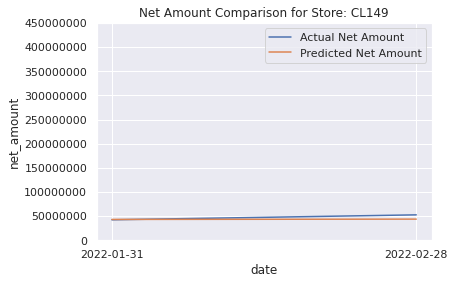

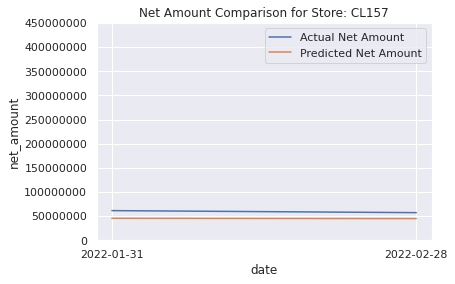

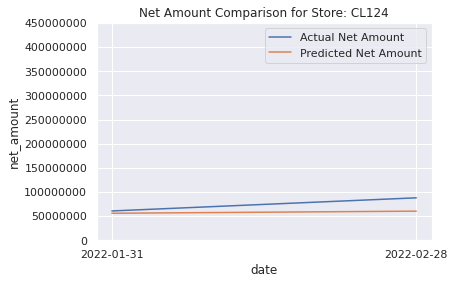

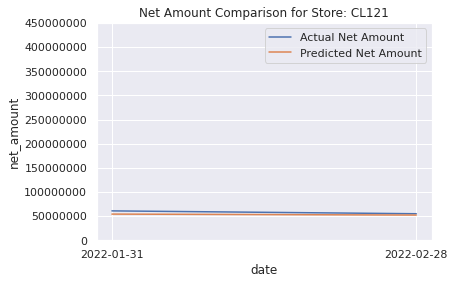

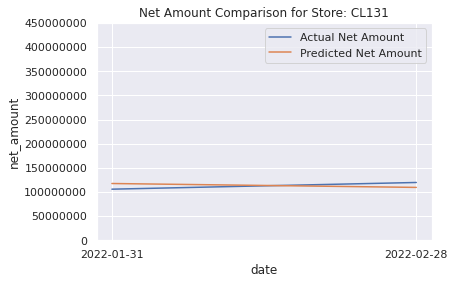

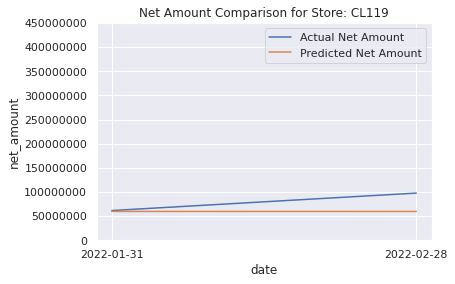

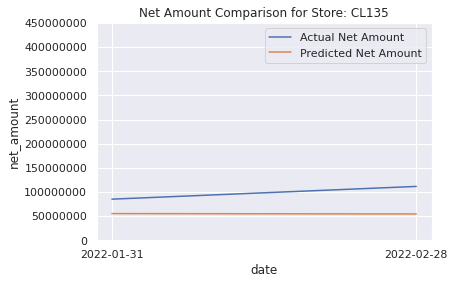

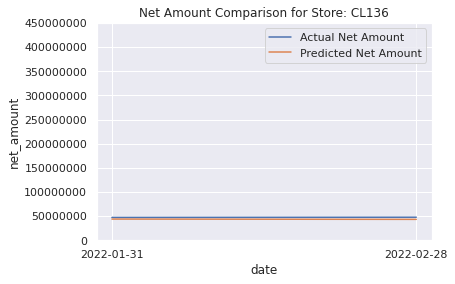

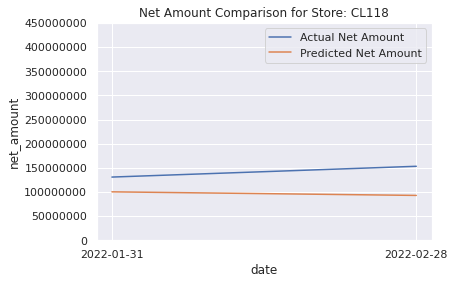

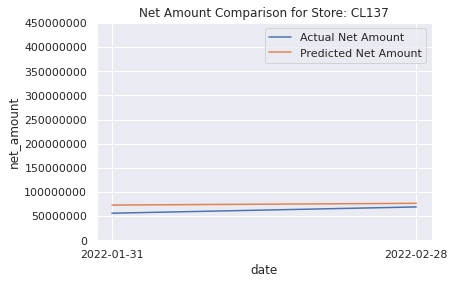

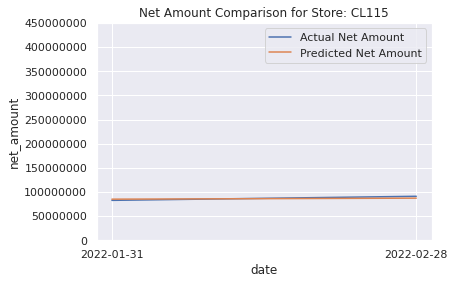

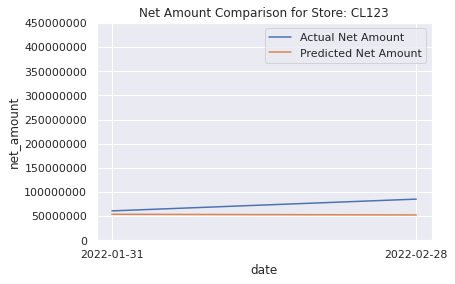

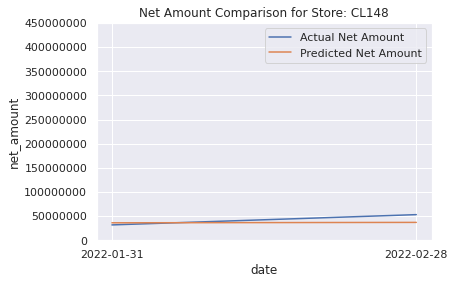

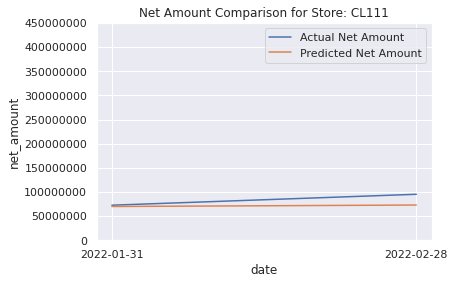

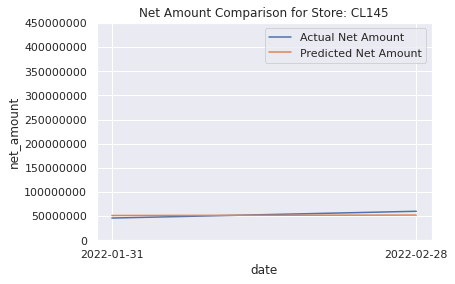

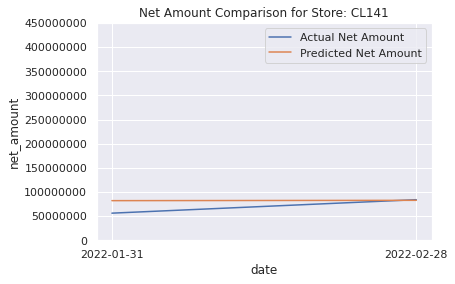

In [117]:
for store_iter in df_ftest['store'].unique():
  plt.figure(figsize=(6,4))
  plt.title('Net Amount Comparison for Store: ' + store_iter)
  sns.lineplot(data=df_ftest[df_ftest.store == store_iter], x='date', y='net_amount', label='Actual Net Amount')
  sns.lineplot(data=df_ftest[df_ftest.store == store_iter], x='date', y='predicted_net_amount', label='Predicted Net Amount')
  plt.ticklabel_format(style='plain', axis='y')
  plt.yticks(ticks=np.arange(0,500000000,step=50000000))
  plt.xticks(df_ftest[df_ftest.store == store_iter]['date'])
  plt.show()

#### Visualizing the Predictions and Actual Values for All Store

In [118]:
# Group by Date and Select Useful Columns
df_ftest.groupby('date').sum()[['net_amount','predicted_net_amount']]

,net_amount,predicted_net_amount
date,,
2022-01-31,4141613257,3935067022
2022-02-28,4505455670,3914058992


In [119]:
monthly_comparison = df_ftest.groupby('date').sum()[['net_amount','predicted_net_amount']]

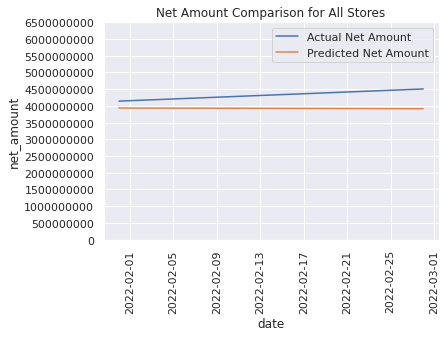

In [120]:
plt.figure(figsize=(6,4))
plt.title('Net Amount Comparison for All Stores')
sns.lineplot(data=monthly_comparison, x='date', y='net_amount', label='Actual Net Amount')
sns.lineplot(data=monthly_comparison, x='date', y='predicted_net_amount', label='Predicted Net Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(ticks=np.arange(0,7000000000,step=500000000))
plt.xticks(rotation=90)
plt.show()

# Deployment

### Dependencies

In [126]:
import joblib

### Save the Model

In [122]:
# Save it Into a 'pkl' for Later Use
joblib.dump(fit_models[best_model], best_model + '_month_predictions.pkl')

['rf_day.pkl']